# Import & Analysing the Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth',100)
import requests

In [2]:
data = pd.read_csv('iPhone_4s_reviews_data.csv')

In [3]:
data.head()

Reviews
0                                                                                                  Bad
1                                                                              Charger not working...😫
2                                                                     one of the speaker doesn't works
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...
4  awesome phone with really great look and performance....you will love it if you will use it...re...

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19371 entries, 0 to 19370
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  19369 non-null  object
dtypes: object(1)
memory usage: 151.5+ KB


In [5]:
data.shape

(19371, 1)

In [6]:
data.isnull().sum()

Reviews    2
dtype: int64

In [7]:
data.dropna()

Reviews
0                                                                                                      Bad
1                                                                                  Charger not working...😫
2                                                                         one of the speaker doesn't works
3      The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...
4      awesome phone with really great look and performance....you will love it if you will use it...re...
...                                                                                                    ...
19366                                          no excitement for iphone users! only  \n2x CPU \n2x Storage
19367                                                                                        Thumbs Up! :)
19368                                                                             Too early to say Hello!!
19369                                  Yes, the same great design! I love it :) \nSpec-wize - thumbs down.
19370                                                                       Hi \nwhat's new in this phone?

[19369 rows x 1 columns]

### Word Count

In [8]:
data['word_counts'] = data['Reviews'].apply(lambda x: len(str(x).split()))
data.head()

Reviews  \
0                                                                                                  Bad   
1                                                                              Charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

   word_counts  
0            1  
1            3  
2            6  
3           52  
4           45

### Characters Count

In [9]:
data['char_counts'] = data['Reviews'].apply(lambda x: len(str(x)))
data.head()

Reviews  \
0                                                                                                  Bad   
1                                                                              Charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

   word_counts  char_counts  
0            1            3  
1            3           23  
2            6           32  
3           52          298  
4           45          266

### Stopword Count

In [10]:
from nltk.corpus import stopwords

In [11]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
data['stopword_count'] = data['Reviews'].apply(lambda x: len([word for word in str(x).split() if word.lower() in stop_words]))
data.head()

Reviews  \
0                                                                                                  Bad   
1                                                                              Charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

   word_counts  char_counts  stopword_count  
0            1            3               0  
1            3           23               1  
2            6           32               3  
3           52          298              23  
4           45          266              22

#  Cleaning  or Text Preprocessing

### Converting all data in lower case

In [13]:
data['Lowercase'] = data['Reviews'].apply(lambda x: " ".join(word.lower() for word in str(x).split()))
data.head()

Reviews  \
0                                                                                                  Bad   
1                                                                              Charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

   word_counts  char_counts  stopword_count  \
0            1            3               0   
1            3           23               1   
2            6           32               3   
3           52          298              23   
4           45          266              22   

                                                                                             Lowercase  
0                                                                                                  bad  
1                                                                              charger not working...😫  
2                                                                     one of the speaker doesn't works  
3  the piece i got is worst piece and it is refurbished.. lot of features not working properly.. i ...  
4  awesome phone with really great look and performance....you will love it if you will use it...re...

### Define a function to clean the text

In [14]:
import re 
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z0-9_]+', ' ', str(text))
    text = re.sub('#',' ',str(text))
    text = re.sub('https?:/\/\[A-Za-z0-9\.\/]+',' ',str(text))
    return text

# Cleaning the text in the review column
data['Punctuation'] = data['Lowercase'].apply(clean)
data.head(50)

Reviews  \
0                                                                                                   Bad   
1                                                                               Charger not working...😫   
2                                                                      one of the speaker doesn't works   
3   The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4   awesome phone with really great look and performance....you will love it if you will use it...re...   
5   I bought an apple 4s 16gb, but this product is full dusted in USB , headphone, speaker ports...T...   
6   You also can work in 2021 but just need small jail break otherwise fantastic phone loved it.. yo...   
7          it have a very very good camera quality it has siri it is good product from apple inc try it   
8   I have been using this phone for more than a year and although I am not a big fan of apple produ...   
9   Excellent product by Apple and no model can beat this beast, Including other models from Apple t...   
10  I bought it in Aug and within a month it has stopped working. This is the worst product I have e...   
11                                                                                              Awesome   
12                                                                                          I loved it👍   
13  very good phone and  i am loving it... its the best..better than any phone of samsung...its reco...   
14  I liked 4s better than 5/5s. I had all 3 and preferred 4s because it's compact and has everythin...   
15  If you're looking for high speed 4G/LTE feature then 4S doesn't have it being a 30+K price phone...   
16  If to say in a nutshell, product is MORE THAN EXCELLENT.My experience say that many global brand...   
17  Ordered this product on 8th of July and I received it on 9th. Here are the pros and cons-Pros:1....   
18  Pros : touch is great, phone response time is superb due to underlying OS.IPhone is much secure ...   
19  Buy, if your Budget is below 13K.I am using the IPhone 4s for more than 10 months now, & i feel ...   
20  This phone has problems with the signal reception.Even when other phones are showing good signal...   
21  It was a wonderful feeling to have my first IPhone. To inform everybody I have used Antroid and ...   
22  Very good phone. iOS does not upgrade more than 9. But really nice for the time when it was rele...   
23  Awesome phone at compare android and windows, only battery backup is low , but battery is good c...   
24  Can be A very good gifts to older peoples.... because They don't need much memory space..... Pho...   
25  Iphone 4S is good but ROM size is too low. why means they giving 8 GB of memory, in that 2.5 GB ...   
26  I  got it  before  the  estimated date. It  was  so  quick.  The  phone  is  original. .I  check...   
27  1 of the speaker is not working, maybe its a refurbished phone. Its alright for the pricing and ...   
28  It's been 1.5 years now that I'm using this phone. It's nice. Got at a deal price here. Awesome ...   
29  I bought an iPhone 4s White, 8GB  through amazon On 31/12/2014 after I got the phone two times w...   
30  I am regular customer on Amazon, I purchased a iPhone 4s 8GB after 15 days I came to know that o...   
31                                                                 Nice Phone .Using for last 4 years .   
32  One and a half year and having issues with voice reception although it is used by my mother so n...   
33  i purchase these for my comfort and other companies give smartphone on big display so i can't ta...   
34                                                                                                   Ok   
35                                                      I reviewed after 4 years usage. look like new..   
36  Wow the phone is juz sturdy metal loaded with ios 8.3 with update ready to 8.4, overall performa...   
37  somehow I prefer my Lumia 

### Remove Stopwords

In [15]:
data['Stopwords'] = data['Punctuation'].apply(lambda x: " ".join(word for word in str(x).split() if word not in stop_words))

In [16]:
data.head()

Reviews  \
0                                                                                                  Bad   
1                                                                              Charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

   word_counts  char_counts  stopword_count  \
0            1            3               0   
1            3           23               1   
2            6           32               3   
3           52          298              23   
4           45          266              22   

                                                                                             Lowercase  \
0                                                                                                  bad   
1                                                                              charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  the piece i got is worst piece and it is refurbished.. lot of features not working properly.. i ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

                                                                                           Punctuation  \
0                                                                                                  bad   
1                                                                                 charger not working    
2                                                                     one of the speaker doesn t works   
3  the piece i got is worst piece and it is refurbished lot of features not working properly i didn...   
4  awesome phone with really great look and performance you will love it if you will use it recieve...   

                                                                                             Stopwords  
0                                                                                                  bad  
1                                                                                      charger working  
2                                                                                    one speaker works  
3  piece got worst piece refurbished lot features working properly returned phone return process lo...  
4  awesome phone really great look performance love use recieved order timely amazon got complete b...

### Lemmatization

In [17]:
# Import Textblob
from textblob import Word

In [18]:
data['Lammatized'] = data['Stopwords'].apply(lambda x: " ".join(Word(word).lemmatize() for word in str(x).split()))
data.head()

Reviews  \
0                                                                                                  Bad   
1                                                                              Charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

   word_counts  char_counts  stopword_count  \
0            1            3               0   
1            3           23               1   
2            6           32               3   
3           52          298              23   
4           45          266              22   

                                                                                             Lowercase  \
0                                                                                                  bad   
1                                                                              charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  the piece i got is worst piece and it is refurbished.. lot of features not working properly.. i ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

                                                                                           Punctuation  \
0                                                                                                  bad   
1                                                                                 charger not working    
2                                                                     one of the speaker doesn t works   
3  the piece i got is worst piece and it is refurbished lot of features not working properly i didn...   
4  awesome phone with really great look and performance you will love it if you will use it recieve...   

                                                                                             Stopwords  \
0                                                                                                  bad   
1                                                                                      charger working   
2                                                                                    one speaker works   
3  piece got worst piece refurbished lot features working properly returned phone return process lo...   
4  awesome phone really great look performance love use recieved order timely amazon got complete b...   

                                                                                            Lammatized  
0                                                                                                  bad  
1                                                                                      charger working  
2                                                                                     one speaker work  
3  piece got worst piece refurbished lot feature working properly returned phone return process lon...  
4  awesome phone really great look performance love use recieved order timely amazon got complete b...

### Sentiment Analysis

In [19]:
from textblob import TextBlob

In [20]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    
    if sentiment_polarity<0:
        sentiment_label = "Negative"
    elif sentiment_polarity>0:
        sentiment_label = "Positive"
    else:
        sentiment_label = "Neutral"
        
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [21]:
# Check function work or not
chk = data['Lammatized'].iloc[0]

In [22]:
get_sentiment(chk)

{'polarity': -0.6999999999999998,
 'subjectivity': 0.6666666666666666,
 'sentiment': 'Negative'}

In [23]:
data['Sentiment_Result'] = data['Lammatized'].apply(get_sentiment)
data.head()

Reviews  \
0                                                                                                  Bad   
1                                                                              Charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

   word_counts  char_counts  stopword_count  \
0            1            3               0   
1            3           23               1   
2            6           32               3   
3           52          298              23   
4           45          266              22   

                                                                                             Lowercase  \
0                                                                                                  bad   
1                                                                              charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  the piece i got is worst piece and it is refurbished.. lot of features not working properly.. i ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

                                                                                           Punctuation  \
0                                                                                                  bad   
1                                                                                 charger not working    
2                                                                     one of the speaker doesn t works   
3  the piece i got is worst piece and it is refurbished lot of features not working properly i didn...   
4  awesome phone with really great look and performance you will love it if you will use it recieve...   

                                                                                             Stopwords  \
0                                                                                                  bad   
1                                                                                      charger working   
2                                                                                    one speaker works   
3  piece got worst piece refurbished lot features working properly returned phone return process lo...   
4  awesome phone really great look performance love use recieved order timely amazon got complete b...   

                                                                                            Lammatized  \
0                                                                                                  bad   
1                                                                                      charger working   
2                                                                                     one speaker work   
3  piece got worst piece refurbished lot feature working properly returned phone return process lon...   
4  awesome phone really great look performance love use recieved order timely amazon got complete b...   

                                                                                  Sentiment_Result  
0   {'polarity': -0.6999999999999998, 'subjectivity': 0.6666666666666666, 'sentiment': 'Negative'}  
1                                   {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}  
2                                   {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}  
3  {'polarity': -0.30999999999999994, 'subjectivity': 0.6777777777777778, 'sentiment': 'Negative'}  
4                                {'polarity': 0.58, 'subjectivity': 0.75, 'sentiment': 'Positive'}

In [24]:
data['Sentiment_Result']

0         {'polarity': -0.6999999999999998, 'subjectivity': 0.6666666666666666, 'sentiment': 'Negative'}
1                                         {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}
2                                         {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}
3        {'polarity': -0.30999999999999994, 'subjectivity': 0.6777777777777778, 'sentiment': 'Negative'}
4                                      {'polarity': 0.58, 'subjectivity': 0.75, 'sentiment': 'Positive'}
                                                      ...                                               
19366                                     {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}
19367                                     {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}
19368                                    {'polarity': 0.1, 'subjectivity': 0.3, 'sentiment': 'Positive'}
19369                                 {'polarity': 0.65

In [25]:
# Split the Sentiment_Result column in three different column
pd.json_normalize(data['Sentiment_Result'])

polarity  subjectivity sentiment
0     -0.700000      0.666667  Negative
1      0.000000      0.000000   Neutral
2      0.000000      0.000000   Neutral
3     -0.310000      0.677778  Negative
4      0.580000      0.750000  Positive
...         ...           ...       ...
19366  0.000000      0.000000   Neutral
19367  0.000000      0.000000   Neutral
19368  0.100000      0.300000  Positive
19369  0.650000      0.675000  Positive
19370  0.136364      0.454545  Positive

[19371 rows x 3 columns]

In [26]:
# Join these column to our dataset
data = data.join(pd.json_normalize(data['Sentiment_Result']))
data.head()

Reviews  \
0                                                                                                  Bad   
1                                                                              Charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

   word_counts  char_counts  stopword_count  \
0            1            3               0   
1            3           23               1   
2            6           32               3   
3           52          298              23   
4           45          266              22   

                                                                                             Lowercase  \
0                                                                                                  bad   
1                                                                              charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  the piece i got is worst piece and it is refurbished.. lot of features not working properly.. i ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

                                                                                           Punctuation  \
0                                                                                                  bad   
1                                                                                 charger not working    
2                                                                     one of the speaker doesn t works   
3  the piece i got is worst piece and it is refurbished lot of features not working properly i didn...   
4  awesome phone with really great look and performance you will love it if you will use it recieve...   

                                                                                             Stopwords  \
0                                                                                                  bad   
1                                                                                      charger working   
2                                                                                    one speaker works   
3  piece got worst piece refurbished lot features working properly returned phone return process lo...   
4  awesome phone really great look performance love use recieved order timely amazon got complete b...   

                                                                                            Lammatized  \
0                                                                                                  bad   
1                                                                                      charger working   
2                                                                                     one speaker work   
3  piece got worst piece refurbished lot feature working properly returned phone return process lon...   
4  awesome phone really great look performance love use recieved order timely amazon got complete b...   

                                                                                  Sentiment_Result  \
0   {'polarity': -0.6999999999999998, 'subjectivity': 0.6666666666666666, 'sentiment': 'Negative'}   
1                                   {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}   
2                                   {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}   
3  {'polarity': -0.30999999999999994, 'subjectivity': 0.6777777777777778, 'sentiment': 'Negative'}   
4                                {'polarity': 0.58, 'subjectivity': 0.75, 'sentiment': 'Positive'}   

   polarity  s

In [27]:
data['sentiment'].value_counts()

Positive    12340
Neutral      4651
Negative     2380
Name: sentiment, dtype: int64

# visualization

In [1]:
# Import required liabraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline
from PIL import Image

ModuleNotFoundError: No module named 'wordcloud'

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

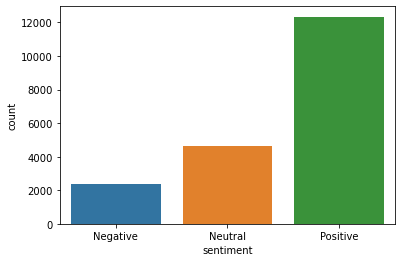

In [29]:
sns.countplot(data['sentiment'])

### Check percentage of every sentiment

In [30]:
positive = data[data['sentiment']=='Positive']['Lammatized']
print(str(positive.shape[0]/(data.shape[0])*100)+ "% of Positive Review")
pos = positive.shape[0]/(data.shape[0])*100

neutral = data[data['sentiment']=='Neutral']['Lammatized']
print(str(neutral.shape[0]/(data.shape[0])*100)+ "% of Neutral Review")
neu = neutral.shape[0]/(data.shape[0])*100

negative = data[data['sentiment']=='Negative']['Lammatized']
print(str(negative.shape[0]/(data.shape[0])*100)+ "% of Negative Review")
neg = negative.shape[0]/(data.shape[0])*100

63.70347426565485% of Positive Review
24.010118217954673% of Neutral Review
12.286407516390481% of Negative Review


In [31]:
positive

4        awesome phone really great look performance love use recieved order timely amazon got complete b...
6        also work 2021 need small jail break otherwise fantastic phone loved still loved hv ordered 2013...
7                                                        good camera quality siri good product apple inc try
8        using phone year although big fan apple product except ipod say pretty decent phone pro 1 look b...
9        excellent product apple model beat beast including model apple till lag much user friendly even ...
                                                        ...                                                 
19360                                                                          come apple original idea gone
19364                                          still complete detail spec since announce tomorrow 10 04 2011
19368                                                                                        early say hello
19369              

In [32]:
negative

0                                                                                                        bad
3        piece got worst piece refurbished lot feature working properly returned phone return process lon...
5        bought apple 4 16gb product full dusted usb headphone speaker port phone look like already used ...
10                                  bought aug within month stopped working worst product ever bought amazon
32       one half year issue voice reception although used mother heavy form usage still issue reception ...
                                                        ...                                                 
19355                           much different iphone 4 tim cook hard time presenting revolutionary tomorrow
19356                                                                                boring spec time change
19361                           apart ios5 nothing changed bad improvement least camera screen size improved
19362      iphones 

In [33]:
neutral

1                                                                                charger working
2                                                                               one speaker work
63                                                                                         thank
66       sim card registered iphone 4 brought amazon phone requires unlock something please help
93                                                                                          foff
                                                  ...                                           
19353                                      hmmm design big internal storage screen size know say
19357                                                                                     want 5
19365                                                                                      thumb
19366                                                   excitement iphone user 2x cpu 2x storage
19367                         

### Piechart

(-1.111309279378153,
 1.1102379766828436,
 -1.1979548015421515,
 1.1189114574755767)

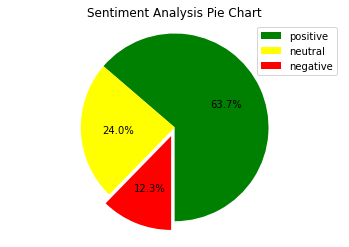

In [34]:
explode = (0,0,0.1)
labels = 'positive','neutral','negative'
sizes = [pos,neu,neg]
colors = ['green','yellow','red']

plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=-90)
plt.legend(labels)
plt.title("Sentiment Analysis Pie Chart")
plt.axis('equal')

### Tokenization

In [35]:
for line in positive:
    print(line)

awesome phone really great look performance love use recieved order timely amazon got complete bill contacted custmer care mail scanned copy quite satisfied
also work 2021 need small jail break otherwise fantastic phone loved still loved hv ordered 2013 daughter use phone
good camera quality siri good product apple inc try
using phone year although big fan apple product except ipod say pretty decent phone pro 1 look brand name2 simplicity great someone like messing different setting want use phone 3 apps one place iphones blow android phone market apps work great optimized work iphone every app promise work pretty much flawlessly4 speed smoothness phone still run faster smoother newer phone galaxy s3 nexus 4 con 1 battery life although people say provides decent battery life never case couple hour casual browsing 3g drain battery completely battery life decent wifi without internet though2 indoor camera quality great3 16 gb memory memory card support apps 100 mb size game 1 gb size pre

iphone 4 best iphone really fast really easy use love camera amazing photo look like taken really expensive camera device slow really great
good cellphone get little glitchy especially older get definitely gotten good use love camera sleek black color
phone 4 year really nice day course little lot time apps crash update great product
great phone severely outdated point used year switching android android person apple enjoy experience phone old want buy get newer model
great little phone favorite iphone never problem mine still work day came gave iphone 6plus still love 4
love iphone type phone ever used although would like upgrade 5 iphone 4 definitely bestfriend
slow camera quality greatest met expectation phone storage greatest bit small pricey phone overall work good great apps much 4 would definitely recommend phone
used one good liked camera small
like phone first adventure smart phone reluctant get b c see need added feature desperatly needed upgrade phone nice meet expectation m

loved first iphone lasted forever going away apple anytime soon
loved iphone 4 love easy everything super easy sync macbook love much 5 6
love phone use work well personal never problem update icloud best app communicating saving file
phone great function well make everything efficient really happy product would recommend friend
dy fast know iphone popular yet follow trend screen crack easily
used iphone 8 year new one dissapoint
super excited iphone finally bought today cannot provide super helpful information seems nice
phone college picture really awesome also great storage
bad better 4 good 5 love o easy use operate
always upgrade apple newest phone operating system always mean always good like slimness phone
5 iphone 4 never let camera great updated phone
good quality freeze time overall great buy looking reliable smart phone
awesome phone cant say enough 100 percent recommend great quality well made
loved iphone 4 upgraded everything worked great till last year owned puppy years 

okay phone job iphone pretty basic phone
take phone back many time one thing another tired iphone made last
best investment ever love iphone think going back anything else
wish memory space pretty good phone love
got phone first came still till day pretty good keep telling update whenever update phone becomes slower aside still pretty decent phone
love iphone 4 easy use great camera user friendly
always loved iphones really ever used feel like becoming slower good device used
first smartphone loved start user friendly quick learn help many people use apple product help question also customer service simply best love iphone
operates decently outdated many apps device fragile must case
love phone gold iphone 4 feel like never fail newer phone see seem ton problem
love phone able use camara computer phone alarm calculator list go upgraded apple iphone 5 apple way family go wrong apple iphones
first iphone ever far favorite loved size shape newer version seem bit flimsy cheap loved iphone 

live without phone started iphone 3 looked back phone keep connected easy use also software update free apps endless use camera video daily basis well
love iphone idea waited long get one think would enjoy touchscreen accurate almost anything app
went android iphone year waiting absolutely love phone iphone
got mine week ago touch screen nice easy use recommend get sturdy case thing break dropped enough recommend survivor case dropped mine plenty time even scratch glitch
iphone 6 month bought stratosphere android broke regret even getting since begginging amazing problem charging battery great touch screen amazing problem like thought would
love iphone like little computer hand sometimes little glitch like would reboot love
love thing never thought switching phone
recently got iphone4 using 3 really great phone enjoy lot three love love love front facing camera
love phone much much storage siri everyone house iphone 5 see need upgrade easy set someone trouble new gadget
apple fangirl a

hardware software ecosystem undoubtedly best using blackberry since last 8 year loyal fan blackberry hahhh iphone experience simply best battery life average go around 8 10 hour 3g multiple call browsing thank much flipkart time delivery
prefer flipkart online purchase since businessman hardly get time go market purchase thing like recent year put price product making preferrable product quality always way delivered factory since site always sell genuine product complaint ebay infibeam complaint whatsoever flipkart journey last 2 5years approx iphone came nice packaging everything exactly way mentioned site
thanks w retail product delivered quickly requested flipkart flipkart stand tall reputation product fresh imported jun 2014 pro 1 io 7 1 brilliant great ui ultra smooth never lag matter many apps open background achieved 512 mb ram amazing customization added notification control centre parent love child filter adult website effectively lot restriction granular level 2 brilliant 3 5

hi ya dude even need like io 8 io 6 wonderful software u find solutuion please inform mail id jagadesh046 gmail com cracking option
make sure buying 8 64 gb
hi compliant ur network authority work fine
hi guy iphone really amazing thing u know buying buy iphone 8gb better buy 16 gb partisan app music etc u fell uncomfortable 8gb u use phone u get new felling wow comparing phone im uncomfortable buy 8gb hop tip may help u lot
using iphone 4 32 gb last two year without problem recently upgraded latest io 9 2 working perfectly well breeze use many new feature iphone 4 really good phone
also hav 64gb bt user available 56 io 8gb used
cannot get latest update io
hey guy iphone 4 support modern combat 5 nfs wanted
p think lastest io update otherwise able get apple support
hi storage u mine 16gb good upgrade
got 9 2 update pretty awesome apple rock yo
hy guy somebody ho know unlock phone iphone 4 free lockt orange u k th
perfect performance io 7 4 really good phone
iphone 4 hav good camera qual

iphone 4 good using
really nice battery removable
please would know battery replaced would able know particular refurbished one picking going last
update io 7 1 iphone 4 acept apn hot spot meaning use wireless modern anyone facing problem fix
please help suggestion choose htc one mini iphone 4 thanks
yes go setting general accessibility assistive touch turn use alternative pressing iphone button
iphone 4 volume high button jam high volume given button side solution without opening set
hey please user really love everything phone please got little cash refurbished one advisable buy
iphone 4 problem returned apple sent new one without charge new one le year started give problem problem connects internet safari message say safari could open page server stopped responding cell phone ocmputers nook ipad work time going tried trouble shoot use thanks help
hello friend planning buy iphone 4 please share comment iphone4s best one compare samsung s4
hi guy want switch iphone 4 samsung grand wor

ever head thing called jailbreak lol
installed fring latest virson application bangladesh going insert mobile press continue net getting validation code active fring help anyone active fring country
need get interrnet setting network carrier able access web via 3g already setting better check mobile data turned check going setting general mobile data go check network carrier setting tapping mobile data network network carrier would usually send setting automatically put micro sim iphone although sure others also happens network carrier need authorise use 3g signal require pay access data service hope help minea
get clearer photo video clip using 4 old 4 photograph expert anything mean normal person street get better photo
let see many try debunk 1 speed dial true iphone favourite list add name tend communicate frequently phone messaging call someone list tap name want send message instead tap arrow next name pointing right bring rest contact info 2 enter number help show option saved h

gorilla cannot read due customer agreement cannot identify device feature gorilla glass favorite device may include gorilla glass even see listed apple douse care advertising corning
cha cha nice joke
son barrow sgii went singapore two day call sgii cannot used went service center find prosessor difective cannot accept warranty buy sgii last september 2011 saudi arabia used warranty bullsit better buy phone
course phone 4 retina display 8 1 megapixels face time viber whats special thing phone siri siri smart program act like human ask question siri would answer example ask siri wear umbrella amused answer like human battery last muck longer io 5 1 updated suggest phone 4
jailbroken iphone best smartphone
motorola startac lot fun
guy pls thinking getting iphone4s blackberry bold5 phone think fun pls help
iphone 4 samsung galaxy iii apple lover say apple iphone better never bothered try galaxy use apple lover tried galaxy galaxy better performance wise user friendly wise app wise ect rou

prefer superior battery life thank much 5 year iphone sale increased obvious flash unnecessary mobile phone
obselete dominates internet besides html5 complete alternative
battery problem io 5 need turn push mail manual mail contact calender setting fetch new data advanced
apple going roll update version 5 1 sooner fix many issue iphone 4 also bring back option 3g option setting
guy going buy apple 4 question buying iphone 1 possible data sharing bluetooth non apple product 2 use gsm cdma alliteratively 3 one worth buy samsung galaxy sii iphone 4 4 battery life iphone 4 thank valuable opinion
go tech support training switch automatically two g 3g available
still supported new platform development stopped bugfix patching mobile flash continues flash live many year android sometimes find problematic use website meego work fine android flash support mobile flash justified many today mobile user want use full websitres mobile counterpart steve job however want people use flash mobile mistak

siri cannot installed officially iphone 4 besides iphone 4 one fastest 8mp camera improved optic also use heavy duty apps huge performance gain obtained jump dual core course normal usage iphone 4 capable phone great bargain many
people always saying apple ipad iphone point flash adobe stop flash mobile device mean iphone far far better smartphone
lol hilarious comment found made name almost similar point made admit anti iphone yet hypocritically advocate free choice hand always said one choose whatever suit best apple non apple seems wiggle way one
adobe longer developing flash mobile device job widely criticized decision include flash iphones appears right flash never lived potential adobe may killing leaving google handset maker lurch company like htc drop support flash like apple follow amazon lead kindle fire build plug want working version flash future device
interesting read 6 pillar steve job design philosophy
iphone perfect fill need many people popular time advantage brand at

exact copy samsung galaxys2
nothing new iphone 4 plenty new feature better spec got iphone 4 definitely going get 4 month
apple always surprise u new iphone joke apple think people fool buy 4 well fool still buy 4 joke
wander job leave apple face announce new iphone 4
disapointment glad bought s2
nothing surprise iphone 4 update io 5 icloud a5 apple chipset 8mega pixel camera looking iphone5 hope much amazing one
hey wtvr u r sying next gen iphone atleast year take announcment powerful android phone also cum market nvidia expected release kal el starting 2011
think samsung choking apple hardware supply otherwise apple might come better specification
samsung 2 better phone 4 many thing 1 dual cor 1 2 ghz 2 super amoled screen 3 screen size 4 3 inch 4 1 gigabyte ram
check better camera 8 mega pixel pic 1080p hd recording video
iphone 4 compared smartphones market today like samsung galaxy s2 keep latest technology software packed smartphones cost wise iphone 4 compared phone overpriced l

In [36]:
for line in positive:
    for token in line.split():
        print(token)

awesome
phone
really
great
look
performance
love
use
recieved
order
timely
amazon
got
complete
bill
contacted
custmer
care
mail
scanned
copy
quite
satisfied
also
work
2021
need
small
jail
break
otherwise
fantastic
phone
loved
still
loved
hv
ordered
2013
daughter
use
phone
good
camera
quality
siri
good
product
apple
inc
try
using
phone
year
although
big
fan
apple
product
except
ipod
say
pretty
decent
phone
pro
1
look
brand
name2
simplicity
great
someone
like
messing
different
setting
want
use
phone
3
apps
one
place
iphones
blow
android
phone
market
apps
work
great
optimized
work
iphone
every
app
promise
work
pretty
much
flawlessly4
speed
smoothness
phone
still
run
faster
smoother
newer
phone
galaxy
s3
nexus
4
con
1
battery
life
although
people
say
provides
decent
battery
life
never
case
couple
hour
casual
browsing
3g
drain
battery
completely
battery
life
decent
wifi
without
internet
though2
indoor
camera
quality
great3
16
gb
memory
memory
card
support
apps
100
mb
size
game
1
gb
size
pre

apple
amazon
service
good
date
delivery
good
phn
like
business
phn
gud
gamers
like
3rd
party
apps
lag
lot
even
xender
simple
transfer
app
lag
lot
gud
normal
use
like
calling
etc
really
great
service
amazon
tension
free
service
amazon
apple
iphone
match
normal
smartphone
class
apart
experience
please
dont
buy
genuine
product
ordered
got
couple
day
various
issue
phone
like
speaker
working
battery
dry
6
hour
really
surprised
die
hard
fan
apple
purchase
iphones
amazon
best
e
seller
market
believe
buying
product
amazon
apple
5
star
experience
sure
phone
get
hot
miserable
use
gifted
parent
dis
satisfied
good
phone
normal
use
get
bit
heated
charging
battery
average
get
drained
quickly
using
even
small
apps
apple
complete
satisfaction
apple
smartphone
worth
every
penny
iphone
magical
virtual
world
give
u
power
explore
theworld
good
experience
iphone
faulty
one
speaker
working
think
iphonr
might
used
queried
return
thank
toamazon
working
better
easy
return
policy
first
iphone
awesome
little
bit

handy
swift
sleek
good
looking
keeping
standard
apple
iphone
battery
backup
normal
use
good
need
charge
charging
using
3g
last
3
hour
keep
sony
power
bank
time
compensate
battery
dryness
time
even
spoke
apple
customer
care
detail
using
itunes
updating
software
help
lot
resolve
issue
without
hassle
must
say
apple
customer
care
people
know
value
customer
service
feedback
initially
afraid
buy
reading
lot
negative
review
must
lucky
got
good
one
without
technical
fault
yet
look
iphone
like
5
6
better
iphone
4
4
truely
good
looking
phone
metal
strip
around
glass
front
back
touch
screen
simply
awesome
feel
like
nothing
use
must
say
everybody
try
iphone
thankful
amazon
delivering
4
right
time
committed
condition
per
specification
e
brand
new
phone
1
year
manufacture
warranty
along
mentioned
accessory
phone
really
good
simple
easy
interface
phone
fast
even
though
ram
512
mb
lag
whatsoever
whether
surfing
net
working
multiple
application
anything
else
gaming
etc
using
since
past
one
month
happy


love
prompt
delivery
product
specified
overall
great
satisfaction
issue
go
amzon
trust
worthy
iphone
4
battery
bought
new
looked
good
piece
perfect
new
box
however
battery
drain
le
24
hr
suspect
whether
apple
defect
defective
fake
piece
sold
decided
return
iphone
4
awesome
phone
better
price
nice
mobile
iphone
4
really
like
phone
deliver
phn
gift
gift
wrap
option
expected
amazon
worry
phn
work
fine
thanks
good
wanted
purchase
iphone
4
confused
reading
many
negative
feedback
issue
raised
customer
handset
sold
used
refurbished
pre
existing
issue
way
confirm
iphones
sold
genuinely
new
refurbished
one
confirmed
make
mind
purchase
thanks
sorry
inform
met
bad
experience
shopping
first
courier
company
deliver
package
time
gadget
kept
lying
local
courier
people
three
day
even
think
informing
secondly
phone
camera
work
timing
opening
parcel
contact
apple
people
replacing
repair
gadget
see
irony
charm
getting
new
phn
gone
thanks
great
experience
awesome
wish
good
awesome
use
phone
4
application


fine
let
see
happen
work
great
think
make
good
deal
encourage
buy
iphone
feell
comfortable
thank
faster
expected
really
appreciate
offer
hopefully
buy
soon
looking
forward
actually
looked
perfect
mom
gonna
love
described
brand
new
ready
activated
local
store
problem
running
perfectly
good
product
work
great
love
phone
recieved
perfect
condition
work
car
audio
even
read
text
best
great
phone
side
dy
pretty
fast
great
good
condition
work
great
phone
excellent
condition
nice
phone
never
work
took
apple
authorized
technician
confirmed
phone
already
opened
cheated
apple
iphone
4
8gb
unlocked
gsm
cell
phone
w
siri
icloud
white
brand
new
scratch
got
time
best
used
new
phone
bought
give
star
would
yes
unlocked
great
product
love
iphone
4
say
mom
thank
u
verry
much
daughter
love
bad
quality
servise
happy
found
tracking
number
recomonded
outstanding
pro
still
slickest
smartphone
experience
new
camera
feature
great
con
smaller
screen
competition
still
flash
support
key
feature
3
5in
retina
960
x


phone
apple
phone
good
camera
like
literally
unable
make
apple
phone
camera
work
well
together
first
iphone
ever
owned
since
owned
two
5
6
thought
amazing
phone
first
got
iphones
come
far
since
4
go
back
4
anytime
soon
may
latest
release
iphone
5
much
reliable
4
4
great
design
amazing
response
us
simplicity
order
accommodate
day
day
need
elegant
style
great
design
also
feature
enhance
photograph
way
apps
work
way
responds
need
remarkable
love
phone
used
fast
drain
battery
life
one
hour
iphone
6
wishlist
year
good
phone
work
well
everything
need
phone
pricey
first
bought
reason
get
5
star
iphone
4
first
iphone
loved
changed
life
better
since
apple
gone
beyond
iphones
impressed
ingenuity
dedication
making
best
user
friendly
product
around
despite
year
passed
phone
still
work
well
course
application
cannot
installed
device
rest
super
practical
photo
take
good
quality
time
passed
like
said
previous
review
apple
product
love
apple
phone
apple
product
made
100
consumer
satisfaction
always
pu

upgraded
time
best
phone
ever
apple
constantly
improving
device
first
iphone
loved
phone
screen
broke
easily
shattered
mine
like
twice
infamous
iphone
4
first
time
iphone
lost
use
oh
loved
got
everything
figured
much
smaller
phone
compared
gotten
since
definitely
good
someone
starting
granted
made
anymore
definitely
would
recommend
iphone
product
tech
savvy
good
phone
vey
old
small
cheap
buy
ebay
one
basic
iphones
back
early
2010s
phone
pretty
inovative
time
screen
nice
apple
music
nice
required
install
program
pc
download
song
look
back
definitely
spoiled
technology
today
great
phone
however
side
phone
software
date
practically
useless
good
part
love
apple
dislike
make
use
one
phone
lot
longer
year
best
phone
ever
life
camera
size
best
course
beautiful
apple
really
best
phone
apple
released
year
since
owned
one
believe
first
iphone
cool
time
loved
probably
recommend
phone
current
time
first
iphone
iphones
work
right
box
tweaking
needed
need
done
expandable
memory
would
great
though
gr

currently
available
app
store
compatible
io
7
looking
4
hoping
get
older
smartphone
cheap
steer
toward
android
option
particularly
value
good
camera
love
phone
phone
lasted
long
time
way
iphone
6
released
run
little
bit
shaky
recent
io
update
finally
decide
upgrade
wanted
larger
screen
better
camera
smoothr
running
newer
iphones
offered
phone
2
year
ago
use
love
much
great
currently
use
iphone
4
ok
great
feel
like
slow
option
apps
limited
screen
resolution
ok
feel
like
take
greatest
picture
love
apple
brand
love
iphones
feel
particular
one
best
used
one
still
use
ipod
love
size
day
phone
biiiig
omg
changed
point
update
software
start
running
slow
great
phone
like
everything
apple
love
brand
made
switch
samsung
galaxy
note
edge
much
happy
iphone
feel
sleek
feel
much
durable
samsung
feel
almost
cheap
plastic
take
getting
used
end
iphone
easy
use
lot
cool
feature
like
live
photo
love
phone
needed
space
upgraded
6
plus
accident
phone
easy
use
good
price
sure
get
good
case
insurance
expensi

love
love
love
loved
4
great
size
smaller
hand
camera
worked
well
easy
use
like
apple
product
worth
price
little
outdated
iphone
4
8gb
preety
good
function
little
slow
work
perfectly
problem
selling
pretty
hard
newest
kind
iphones
pretty
happy
smartphone
right
recommend
phone
great
iphones
came
would
buy
newest
iphone
one
going
obsolete
love
apple
product
ability
work
laptop
ipad
etc
awesome
expensive
icould
best
virus
protection
super
easy
use
user
friendly
improve
pricing
love
apple
laptop
tablet
etc
phone
great
used
took
great
picture
never
lagged
however
battery
life
great
great
phone
seem
clitches
though
freeze
time
time
actually
purchased
black
color
husband
first
smart
phone
best
feature
brand
phone
easy
learn
definitely
reliable
never
crashed
always
room
improvement
great
decision
husband
although
phone
great
wait
till
next
generation
model
released
comfortable
handle
slightly
rounded
edge
great
phone
small
size
decent
camera
would
recommend
anyone
like
smaller
device
great
peo

use
simple
picture
quality
great
know
would
without
iphone
listen
podcasts
easily
access
email
facetime
mom
also
think
price
point
bad
excited
recommend
iphone
4
available
black
white
three
different
amount
internal
memory
199
model
come
16gb
internal
memory
299
get
32gb
internal
memory
64gb
model
cost
399
price
contingent
signing
two
year
cell
phone
contract
verizon
sprint
apple
also
sell
unlocked
version
phone
tied
specific
cell
phone
carrier
additional
450
total
649
849
dollar
per
phone
iphone
4
provided
countless
hour
playing
crunch
candy
candy
say
sweet
tasty
know
accomplished
great
thing
also
provided
many
hour
talking
stinky
kid
instagramming
siri
wealth
knowledge
none
friend
smarter
siri
first
smart
phone
regret
ample
one
best
touch
screen
great
think
iphone
4
almost
indestructible
dropped
mine
countless
time
shatter
battery
could
better
sleek
phone
always
work
well
take
good
picture
easy
use
little
problem
apple
product
fairly
inexpensive
use
iphone
4
right
love
phone
everythi

say
main
drawback
like
iphones
battery
life
horrible
although
somewhat
obsolete
iphone
4
good
phone
absolutely
love
phone
h
great
phone
super
easy
use
love
camara
speed
pbone
reliable
phone
always
count
phone
work
matter
change
anything
gusta
porque
tiene
muchas
funciones
e
rapido
la
calidad
de
la
fotos
e
buena
ademas
el
tama
ideal
incre
ble
tel
fono
uno
de
los
mejores
en
el
mundo
para
iphone
e
el
mejor
best
brand
phone
little
expensive
vale
la
pena
totalmente
e
un
tel
fono
hermoso
cl
sico
de
buena
calidad
el
software
e
f
cil
de
usar
apps
para
lo
que
quieras
tengo
4
o
con
el
n
puede
dar
de
l
incre
ble
este
tel
fono
cambio
apple
por
nada
en
el
mundo
update
high
enough
get
use
even
see
skin
colored
emojis
let
alone
new
food
etc
phone
decent
phone
problem
screen
seems
easily
cracked
shattered
definitely
mother
two
child
love
play
phone
loved
4
great
size
phone
never
issue
anything
work
well
around
3
year
falling
apart
still
like
easy
apple
phone
use
definitely
rip
great
phone
one
like
eve

invade
may
need
back
future
lol
better
smartphones
let
update
os8
downloads
lot
apps
first
iphone
ever
bought
amazed
image
sound
quality
good
device
survived
many
accident
haha
guess
still
work
perfectly
new
loved
everything
phone
like
technology
always
new
model
coming
making
outdated
soon
love
user
friendly
phone
wish
would
offer
little
better
pricing
loved
iphone
easy
use
feature
great
clear
camera
really
great
storage
easy
use
like
choose
color
range
price
range
comparable
feature
slim
stylist
looking
phone
year
awesome
every
one
else
iphone
6
iphone
4
work
awesome
affordable
since
phone
met
expectation
needed
call
text
yes
would
recommend
others
enjoyed
4
much
great
phone
many
year
liked
size
shape
4
phone
apps
worked
great
never
problem
time
upgrade
month
new
apps
work
old
technology
phone
always
since
came
always
love
apple
product
love
iphone
currently
new
iphone
se
love
camera
easy
use
fact
something
go
wrong
usually
easy
fix
generally
thing
go
wrong
big
fan
would
say
total
ap

fine
okay
would
prefer
android
little
memory
16
gig
put
picture
music
even
minimal
amount
apps
constantly
run
memory
think
user
friendly
apple
status
symbol
phone
september
last
year
trusty
phone
might
bad
camera
compared
new
phone
6
64
gig
job
good
4
year
cracked
within
last
6
month
went
2
speck
candyshell
case
2
otter
box
defender
case
duration
phone
newer
software
make
phone
run
bit
slower
also
get
size
phone
planning
delete
photo
uploading
onto
computer
hard
drive
space
run
quick
overall
great
phone
height
lack
comparison
newer
one
recommendation
get
phone
opt
5
6
best
phone
ever
like
iphones
life
easy
work
hard
put
music
beautiful
camera
love
iphone
miss
iphone
four
easy
use
safari
icloud
great
feature
phone
easy
download
apps
size
phone
perfect
first
iphone
really
miss
speed
good
phone
thing
like
front
glass
careful
make
sure
get
really
good
case
phone
perfect
love
iphone
thing
think
changed
like
update
phone
anymore
get
apps
love
use
iphone
4
daily
basis
love
quality
would
love


ever
purchaced
screen
ever
shattered
got
iphobe
4
4
5
5
6
byfar
best
iphone
screen
quality
recent
upgrade
iphone
4
held
year
dropped
many
time
still
crack
reliable
phone
best
experience
use
macbook
pro
itunes
really
best
phone
ever
love
memory
space
however
cloud
get
full
quickly
calendar
used
daily
love
love
accessibility
apps
huge
fan
music
app
new
layout
overall
pretty
great
phone
love
apple
every
iphone
owned
apple
4
minor
problem
like
glitch
phone
never
anything
needed
fixing
awesome
phone
would
choose
apple
android
day
display
speed
reliability
everything
better
old
phone
4
nice
phone
small
heavy
prefer
iphone
5
user
friendly
great
camera
freeze
enough
storage
space
music
photo
first
iphone
fantastic
small
light
thicker
newer
one
great
camera
work
well
even
though
5
year
old
great
phone
phone
made
never
want
phone
ever
great
phone
much
memory
storage
16gb
showed
needed
storage
unlocked
one
iphone
4
good
phone
sometimes
act
considering
apps
storage
used
run
little
slow
app
may
fre

full
screen
apps
either
ipone
4
third
ipone
useful
easy
use
issue
memory
16
gb
quickly
used
store
picture
delete
unused
apps
frequently
absolutely
love
iphone
4
exception
enough
memory
upgraded
5
recently
went
iphone
6
apple
way
go
people
iphone
6
love
like
bigger
screen
look
lot
better
photo
camera
quality
improved
currently
waiting
upgrade
ill
getting
iphone
6
old
phone
iphone
3
6
grandson
love
wi
fi
phone
play
game
good
phone
newer
version
better
still
ios9
thats
plus
used
white
iphone
4
year
although
served
purpose
couple
problem
example
battery
could
never
keep
charge
matter
top
glass
front
back
although
pleasing
eye
touch
fragile
mine
att
love
iphones
probably
never
use
another
phone
problem
never
seems
enough
storage
although
updated
iphone
many
feature
comfortable
excellent
start
learning
use
apple
brand
phone
year
back
loved
issue
power
button
stopped
working
start
run
slower
nearing
end
contract
loved
product
forever
person
us
apple
love
phone
quality
picture
great
every
time

size
4
6
large
love
phone
camera
amazing
memory
amble
enough
room
love
picture
music
eception
para
el
iphone
4
fue
en
general
favorable
los
revisores
observaron
siri
la
nueva
c
mara
velocidades
de
procesamiento
ventajas
significativas
con
respecto
al
modelo
anterior
13
14
15
fue
sucedido
por
el
iphone
5
como
el
tel
fono
estrella
de
apple
el
12
de
septiembre
de
2012
love
iphone
used
husband
samsung
galaxy
5
month
waited
upgrade
broke
iphone
5
iphone
6
hated
feature
wish
iphone
ad
card
would
awesome
easier
also
hate
itunes
music
downloading
still
think
iphone
better
phone
also
samsung
supposed
better
camera
picture
took
husband
phone
grainy
looked
bad
picture
take
iphone
always
awesome
great
phone
way
better
new
iphones
coming
lately
phone
extremely
sturdy
even
constant
use
lasted
almost
3
year
much
longer
recent
iphones
lasted
great
phone
turned
apple
product
fan
ever
since
ease
use
every
phone
like
love
apple
apple
product
never
hidden
file
downloading
love
design
layout
phone
good
ots

recommend
anyone
huge
apple
fan
phone
great
come
nice
size
memory
love
feature
size
phone
many
year
decently
functioning
phone
data
storage
capacity
stink
get
alert
time
enough
storage
take
photo
apps
crash
time
apple
stopped
supporting
phone
year
ago
wish
render
phone
totally
useless
worth
nothing
buy
4
laundered
5
4
would
probably
perfectly
fine
already
5
4
much
slower
launching
apps
love
iphone
camera
quality
great
apple
continues
make
product
consistent
user
friendly
apple
best
everything
phone
good
nice
looking
girly
everything
wanted
oldie
goodie
old
phone
stopped
working
looking
cheap
replacement
found
great
deal
unlocked
iphone
4
pleasantly
surprised
wonderful
phone
especially
since
gen
old
phone
year
still
work
perfectly
refuse
even
try
another
phone
phone
2
year
switching
another
iphone
going
blackberry
android
beforehand
found
device
user
friendly
lay
easy
get
hang
since
switching
would
switch
back
anything
else
first
smartphone
purchase
totally
fell
love
apple
wish
opted
st

love
iphone
4
first
apple
phone
beside
ipod
ipads
fit
palm
hand
siri
better
camera
previous
model
liked
time
release
pretty
slow
compared
phone
love
love
love
really
wish
space
amazing
size
phone
nice
put
want
really
like
colour
white
contrast
light
blue
case
fact
phone
16gb
drive
crazy
every
time
phone
tell
enough
space
prefer
oen
64gb
thinking
change
iphone
6
great
basic
phone
lot
memory
love
photo
music
love
apps
simple
layout
phone
love
phone
even
almost
year
several
software
update
battery
life
great
even
dropping
twice
still
perfect
condition
even
missed
toilet
meer
inch
came
quick
original
packaging
loved
old
iphone4
job
gave
company
phone
got
laid
went
another
phone
2
number
went
back
current
iphone4
reason
give
3
star
refurbished
phone
1
star
home
button
slowly
rotates
clockwise
2nd
star
instead
pressing
squared
well
square
turn
diamond
back
square
cycle
continues
considering
2
reason
giving
thing
year
take
dump
would
bought
virgin
mobile
site
stopped
carrying
iphones
reason
a

back
iphone
owned
android
past
iphone
always
way
pulling
back
recently
bought
iphone
4
son
absolutely
love
issue
whatsoever
greatest
worked
time
needed
phone
definitely
great
phone
first
came
many
many
option
better
camara
quality
good
enjoy
easy
use
lot
love
calendar
put
thing
set
alert
forget
stuff
loved
phone
lasted
3
year
began
get
slower
able
much
else
ran
gb
quickly
take
lot
photo
great
phone
great
phone
16gb
lot
space
tho
many
app
music
iphones
pretty
great
opinion
4
definitely
one
favorite
ideal
size
sophisticated
appearance
thing
would
say
trouble
past
back
front
phone
cracking
pretty
easily
may
clumsy
also
camera
quality
seems
slightly
lacked
phone
memory
seems
fill
pretty
quickly
change
iphone
4
anything
mind
6
beggar
chooser
first
iphone
made
long
doctor
office
wait
bearable
easy
use
loved
quality
camera
work
good
con
prefer
looking
iphone
get
iphone
6
iphone
6
mon
love
really
good
feature
always
useful
day
day
usage
love
photo
quality
general
like
brand
apple
husband
elect

great
beat
headphone
even
better
loved
little
flashing
light
notify
email
message
biggest
thing
camera
forward
facing
camera
iphone
4
garbage
always
looked
orange
slightly
blurry
whereas
htc
one
take
sharp
quality
photo
front
back
since
switching
found
thing
miss
airplay
android
phone
able
near
future
worried
iphone
4
loved
got
broke
switch
android
hated
front
camera
horrible
blurry
unlike
iphone
loved
layout
apps
better
iphone
yes
screen
may
smaller
quality
way
better
graphic
game
great
along
video
pretty
load
speaker
one
excited
girl
coming
day
wait
excited
think
great
phone
everything
need
switching
blackberry
bold
iphone
4
one
best
decision
made
technology
thing
around
phone
camera
seem
clear
thought
used
workable
downside
iphone
lack
camera
quality
also
8gb
run
quickly
find
constantly
deleting
apps
picture
always
resetting
phone
add
storage
thing
phone
amazing
owned
one
eventually
system
basic
everything
requires
purchase
ringtones
decent
compatible
apps
business
music
convenient


bit
pricier
worth
android
would
phoneless
day
ideal
job
kid
loved
iphone
4
first
smartphone
buy
apple
smartphones
efficient
sophisticated
brand
lobg
lasting
still
4
lol
need
charger
still
take
wonderful
picture
love
thw
feature
many
time
dream
going
back
iphones
costly
one
day
one
day
first
iphone
lasted
many
year
loved
much
small
seemed
almost
indestructible
eventually
speaker
wore
replace
newer
model
looking
back
phone
good
love
apple
stuck
phone
phone
definitely
pricey
time
generation
phone
amazing
reliability
reliable
software
outdated
would
recommend
phone
generation
yes
easy
recommend
others
got
day
came
since
previous
phone
stolen
couple
day
loved
loved
thumb
print
reader
made
easy
unlock
phone
iphones
general
great
product
wish
battery
lasted
longer
memory
phon
36
gig
phone
ran
space
year
usage
said
switch
apple
hard
leave
iphone
11
right
phone
heavy
bulky
took
great
photo
time
course
lot
model
came
one
iphone
4
great
first
came
upgraded
8
realized
bad
camera
4
far
layout
prett

best
feature
tied
w
siri
apple
always
cutting
edge
great
technology
love
iphone
phone
bought
last
year
phone
year
ago
think
first
one
front
camera
amazing
first
came
amount
picture
thing
crazy
good
first
iphone
small
hard
use
glad
got
upgrade
phone
year
ago
great
cell
phone
predecessor
also
wonderful
tried
apple
product
definitely
vouch
product
love
using
phone
good
compared
new
phone
tiny
barely
work
see
everything
much
worse
could
newer
phone
also
face
id
something
really
dislike
4
crappy
camera
recommend
newer
phone
everyone
every
new
iphone
part
reliable
phone
easy
use
go
big
hype
getting
every
new
phone
company
see
switching
trash
every
apple
product
amazed
first
year
store
second
iphone
definitely
nicer
looking
glass
compared
3gs
hold
well
completely
gave
time
fixing
screen
glad
improved
majorly
since
recommend
first
let
say
love
product
amazing
really
like
far
work
many
time
big
importance
facilitates
work
high
quality
validate
confirmed
ever
since
iphones
came
using
iphones
def

device
help
promote
product
reviewing
video
purpose
fyi
encouraging
people
buy
internet
time
help
company
promote
iphone
good
resolution
camera
le
operating
system
becomes
somewhat
slow
something
stress
people
deal
slow
phone
obviously
time
phone
boom
simple
fact
iphone
better
phone
iphone
4
16
gb
space
grey
unlocked
version
never
fan
iphones
first
one
let
honest
bought
iphone
could
find
good
replacement
previous
htc
one
x
someone
switching
android
platform
lot
trouble
copying
contact
photo
depend
itunes
etc
copy
music
phone
put
battery
seems
last
ok
nothing
write
home
someone
spend
considerable
amount
time
browsing
phone
photo
quality
good
iphone
make
life
easier
family
friend
also
user
apple
product
since
face
time
air
drop
feature
convenient
overall
would
switch
back
android
next
time
market
new
phone
start
phone
received
gift
3
year
ago
since
fallen
countless
time
protective
case
took
tumble
ocean
tumble
ocean
wave
caused
flash
stay
week
time
kill
camera
stopped
working
5
month
bea

find
iphone
feature
good
phone
screen
broke
inside
reason
like
expandable
memory
like
love
others
better
since
improved
year
still
good
phone
first
apple
phone
loved
daughter
us
play
apps
still
work
like
charm
love
iphone
trade
anything
well
maybe
iphone
6
lol
easy
use
understand
iphone
4
filled
storage
quickly
also
would
die
really
early
regardless
phone
say
would
die
30
40
iphone
great
apple
product
due
old
may
run
issue
second
iphone
easy
use
compact
great
camera
newer
model
came
love
phone
long
time
far
good
food
wok
fast
take
good
pic
love
happy
ton
software
issue
camera
great
second
time
owned
exact
phone
serf
purpose
problem
larger
phone
market
would
prefer
bigger
screen
apple
4
16gb
great
handheld
device
simple
beginner
yet
limitless
amount
apps
tech
savvy
keep
charged
day
normal
use
freeze
stop
responding
love
iphone
easy
use
lightweight
always
case
everywhere
iphone
4
forever
upgrading
iphone
5
great
phone
reliable
easy
use
good
phone
hate
fact
lot
glass
drop
odds
r
gonna
bre

small
outdated
work
well
love
apple
well
would
like
better
phone
though
phone
surprisingly
okay
battery
life
expect
iphone
put
good
case
want
shattered
month
love
apple
operating
system
think
great
phone
time
buy
something
newer
obviously
apple
never
disappointed
first
iphone
going
back
phone
like
change
apple
update
smoothly
transition
change
newer
iphone
like
buy
lifeproof
case
cuz
must
iphone
4
may
great
6
like
small
still
fit
pocket
able
everything
want
love
product
defiantly
get
job
done
worth
try
people
used
love
phone
good
phone
small
screen
memory
run
fast
software
update
old
best
use
anymore
already
used
using
apple
product
however
still
think
product
relatively
easy
use
run
fairly
quickly
problem
fact
product
updated
newest
io
mean
feature
available
apps
downloaded
however
majority
apps
problem
older
version
downloaded
loved
phone
first
got
call
icrap
slow
always
say
free
space
hardley
anything
cant
take
40
picture
say
space
cant
wait
contract
upgrade
samsung
good
first
iphon

abit
slow
want
upgrade
6
soon
okay
suppose
still
work
always
drop
without
case
broke
yet
love
apple
product
gonna
get
iphone
6
pretty
soon
classic
version
iphone
perfect
live
simple
life
high
tech
actually
love
phone
small
size
make
easy
store
since
fit
conveniently
almost
every
one
pocket
clothes
however
camera
low
quality
picture
come
looking
pixelated
close
memory
also
limited
storage
necessary
use
apps
purchase
pay
every
month
love
iphone
4
outlasted
galaxy
cracked
2
month
iphone
survived
toilet
dropped
30
ft
son
11
great
phone
durable
dropped
alot
us
game
storage
good
phone
3
year
never
ever
failed
phone
lasted
longest
still
work
bought
new
iphone
saved
iphone
4
case
something
happens
one
amazed
great
problem
16gb
nothing
needed
space
love
phone
way
work
apps
still
wok
homework
honestly
best
phone
version
iphone
honestly
part
life
size
perfect
pretty
hard
damage
remember
phone
reliable
great
go
travel
never
disappointed
yet
refurbished
4
worked
time
liked
close
apps
using
stop
wor

year
first
iphone
since
upgraded
iphone6
gave
4
8
year
old
daughter
us
game
wifi
love
longest
lasting
phone
ever
would
recommend
phone
4
old
sure
would
rather
one
updated
phone
omg
omg
omg
really
get
one
amazing
yeahhhhhhhhhh
love
everything
phone
except
poor
camera
quality
liked
picture
fine
upgrade
got
stolen
go
back
one
photo
quality
made
sad
longer
owned
iphone
4
gave
alway
mother
shes
much
new
phone
perfect
said
easy
navigate
love
phone
smart
phone
amazed
much
difference
make
life
old
phone
loved
kept
daily
task
never
issue
wish
screen
bit
bigger
guess
upgraded
phone
bigger
screen
always
reliable
apple
product
older
model
however
many
feature
apps
update
making
date
nearly
obsolete
point
would
recommend
purchasing
model
functionality
longer
best
one
newer
model
would
given
sky
star
highly
recommended
great
phone
always
love
apple
product
especially
iphone
great
quality
battery
life
love
iphone
great
quality
easy
navigate
amount
educational
fun
apps
offer
child
awesome
kid
know
pho

apple
great
phone
everything
need
love
life
fingertip
still
use
iphone
4
reason
replace
phone
probably
one
better
phone
ever
love
apple
product
wait
upgrade
go
phone
really
liked
phone
would
buy
price
lower
easy
use
love
apple
product
would
def
say
go
verizon
get
many
gb
really
want
new
iphone
always
slow
upgrade
love
new
emojis
apps
bell
whistle
wish
could
go
back
phone
best
phone
ever
created
apple
type
ago
updated
5c
love
apple
phone
simple
easy
use
oh
man
love
iphone
4
phone
4
year
never
got
trouble
bunch
storage
really
download
bunch
apps
love
work
loved
everything
dropped
water
think
pretty
much
dropped
much
time
lost
count
still
working
lost
phone
broke
hear
greater
6
love
much
love
4
loved
iphone
like
text
one
letter
time
went
back
android
apple
computer
apple
iphone
4
16gb
smartphone
black
unlocked
great
phone
want
phone
crack
put
good
secure
case
well
screen
protector
also
update
phone
slower
buggier
get
smart
phone
many
alternate
us
say
exceptional
value
make
perfectly
clear

well
actually
iphone5s
say
love
iphone
recommend
use
everyday
problem
love
great
phone
consider
looking
refurbished
phone
market
last
without
issue
really
liked
run
smooth
problem
like
lg
phone
better
good
phone
worth
newer
update
apps
like
snapchat
work
older
phone
like
one
technology
move
fast
get
iphone
5
obsolete
soon
still
good
old
trust
reliable
iphone
4
everything
5
5
6
6
6
love
phone
much
still
use
play
game
really
stay
charged
long
time
old
awhile
love
phone
year
upgraded
5
issue
never
cared
siri
screen
got
crack
hit
bag
contained
bottle
liquor
concrete
wall
blemish
first
apple
product
good
little
small
useful
phone
literally
almost
5
year
still
worked
great
never
issue
loved
4
update
started
getting
larger
started
slow
also
much
easier
shatter
cracked
front
back
mine
great
product
love
better
really
quality
product
seen
using
phone
right
use
picture
kind
thing
could
definitely
use
separate
back
button
used
phone
loved
dobt
anymore
upgraded
worth
money
absolutely
loved
iphone


apps
take
awesome
pic
still
use
phone
ipod
great
phone
good
cell
phone
big
problem
battery
hold
long
also
memory
full
quickly
great
phone
new
however
would
recommend
instead
would
go
least
5
6
software
update
older
phone
like
4
cause
software
issue
almost
every
iphone
love
would
go
back
many
generation
new
phone
phone
since
week
like
easy
use
even
battery
best
point
first
phone
great
started
difficulty
volume
always
randomly
closed
apps
currently
iphone
4
come
september
upgrading
iphone
4
long
either
free
discounted
price
love
iphone
4
much
feel
need
get
upgrade
iphone
6
cracked
screen
still
job
android
user
switched
iphone
bought
4
love
still
using
upgrade
5
6
force
close
apps
time
like
android
use
really
big
apple
lover
pas
6yrs
since
forced
upgrade
phone
suddenly
know
started
act
really
wack
apple
go
wrong
lol
first
smartphone
loved
owned
phone
year
half
leaving
top
car
still
miss
layout
amazing
time
released
received
battery
speed
best
last
day
went
g2
losing
missed
iphone
much
end

ago
nice
play
music
car
siri
guided
u
super
smart
investment
love
everything
phone
except
volume
control
little
hard
hearing
volume
phone
call
voice
message
lacking
best
phone
world
droid
phone
crap
compared
iphone
4
even
balllpark
love
iphone
much
great
favorite
phone
really
easy
use
love
seri
happy
music
phone
variety
apps
one
device
music
lover
like
would
recommend
getting
highest
gb
phone
fill
fast
love
iphone
phone
everything
everything
need
fast
love
marc
marc
jacob
case
love
apple
product
iphone
4
year
never
switch
android
took
switch
froma
droid
phone
well
worht
switch
everything
sync
love
wish
could
load
music
apps
free
update
4
5
came
siri
map
much
better
love
iphone
iphone
user
emoji
awesome
best
product
solely
blackberry
girl
year
iphone
4
glad
switched
wish
would
stayed
carrier
thing
run
data
like
nobody
business
worth
really
good
love
much
boyfriend
iphone
4
great
phone
thing
complains
able
download
music
apps
like
would
android
got
everything
need
always
keep
occupied
du

take
hour
reading
owner
manual
understand
everything
phone
siri
fabulous
handy
constantly
go
little
time
send
text
love
front
facing
camera
know
look
like
take
picture
lot
get
good
picture
taking
one
others
regular
camera
much
better
phone
others
image
clear
consistent
take
photo
look
like
high
definition
browsing
speed
phone
also
much
better
soon
press
go
site
pop
dropped
call
rarity
improved
antenna
phone
definitely
must
love
love
apple
product
iphone
4
ipad
love
iphone
much
ever
imagined
easy
operate
take
manual
begin
using
right
box
mine
two
year
happier
used
iphones
honestly
say
best
innovative
phone
ever
even
iphone
5
easily
said
worse
phone
barely
modified
still
iphone
4
much
changed
iphone
4
make
much
better
phone
one
best
phone
market
oh
love
apple
product
haha
especially
love
iphone
4a
though
screen
huge
yet
phone
still
amazing
comfortable
size
saved
bottom
lost
stranded
ton
time
apple
map
navigation
ty
apple
camera
amazing
love
game
connection
apple
fan
friend
wait
see
next


offer
great
apps
safe
sharing
fast
service
picture
come
great
high
quality
siri
helpful
run
needing
quick
information
iphone
junkie
recommend
anyone
love
iphone
need
apps
come
cam
come
handy
also
great
camera
quality
whole
family
love
phone
year
opinion
live
hype
alsi
android
prefer
love
iphone
4
basically
love
iphone
general
think
organization
navigation
iphones
much
simpler
easier
smart
phone
happy
since
got
love
phone
last
phone
env3
ready
get
something
helpful
even
tho
going
cost
month
paying
month
env3
basic
text
messaging
450
minute
paying
alot
went
iphone
4
love
hate
battery
life
love
phone
apps
camera
etc
best
decision
made
yet
worth
money
pay
month
th
phone
great
love
everything
iphone
2
yr
still
loving
love
facetime
without
wifi
ive
ever
iphone
refuse
change
somple
use
effective
iphone
4
like
life
shop
blog
jsut
amazing
love
iphone
4
smart
phone
smart
easy
use
cool
feature
fun
apps
play
love
would
never
trade
iphone
anything
definitely
one
best
investment
thing
new
iphone
5
e

love
iphone
4
best
phone
ever
although
problem
month
replaced
definitely
still
happy
phone
relationship
apple
product
since
2004
love
functionality
issue
handled
better
android
apple
make
way
iphone
4
honest
totally
love
especially
love
siri
everything
everyone
get
always
afraid
trying
full
touch
screen
say
love
phone
since
first
came
loved
unconditionally
annoyance
battery
run
pretty
quickly
absolutely
love
phone
leave
home
many
great
feature
finally
made
jump
iphone
regretted
since
first
iphone
4
look
forward
6
come
super
recommend
got
4
year
ago
still
like
new
everything
need
use
social
networking
camera
taking
picture
blog
like
slower
internet
smaller
screen
get
phone
iphone
5
bigger
lte
way
cooler
cheap
get
5
live
without
iphone
amazing
honestly
phone
amazing
download
much
game
possible
also
program
entertaining
also
many
business
apps
available
loved
iphone
4
siri
helped
fight
lost
thing
like
battery
life
love
much
hooked
love
asking
suri
stupid
question
given
got
phone
21
yes
fi

helpful
everything
iphone
4
entertaining
also
really
helpful
getting
apple
product
long
time
working
gamestop
usps
decided
needed
ipod
could
listen
music
worked
well
hubby
found
amazing
deal
iphone
4
bought
working
crappy
cheap
4g
phone
decided
time
upgrade
played
phone
decided
time
get
love
matter
device
using
access
stuff
music
etc
thinking
getting
iphone
4
get
siri
amazing
map
icon
better
iphone
5
one
far
love
dressing
phone
case
haha
recently
purchased
phone
love
much
find
caught
fun
highly
recommended
love
much
earlier
version
got
dropped
kinda
glad
one
rock
best
thing
ever
personally
like
better
iphone
5
le
chance
break
drop
also
like
iphone
5
smaller
small
new
big
atidcted
iphone
use
everything
world
best
phone
never
getting
brand
love
apple
product
especially
4
freezing
crashing
last
forever
love
phone
beautiful
easy
use
ever
since
first
iphone
came
wanted
past
year
finally
got
iphone
4
could
love
phone
enough
everything
simply
laid
app
store
endless
amount
apps
choose
great
ba

drop
crack
whole
thing
could
die
would
know
experience
haha
3
android
device
broke
glitched
finally
happy
never
trade
iphone
love
problem
since
first
got
honestly
cant
think
something
phone
cant
phone
everything
love
iphone
think
ever
change
different
type
phone
everything
would
want
everything
charge
quickly
love
love
phone
everything
hoped
iphone
4
barely
ever
crash
unlike
droid
device
freeze
much
although
still
sometimes
many
feature
good
well
rounded
phone
one
thing
like
support
flash
love
phone
used
android
girl
upgrade
came
know
whether
remain
android
switch
iphone
happy
switch
never
go
back
android
iphone
life
great
phone
brother
father
non
stop
use
anything
everything
possibly
think
owned
iphones
past
found
running
back
android
every
time
thought
iphone
4
would
keep
happy
pre
ordered
came
kept
two
day
returning
never
go
back
iphone
limited
phone
small
screen
finger
kind
big
maybe
gotten
used
yet
work
faster
smoothr
thing
easy
use
fun
play
think
anything
always
iphone
love
iphon

siri
fun
mess
around
became
iphone
owner
3
year
ago
never
switch
smartphone
far
way
easier
use
droid
window
phone
siri
helpful
use
google
daily
basis
lot
question
world
simple
operate
clean
design
would
recommend
otterbox
life
proof
case
since
whole
phone
made
glass
drop
mine
daily
basis
one
year
old
son
keep
otterbox
mine
0
wear
tear
iphone
love
iphone
never
freeze
get
slow
receive
send
message
fast
many
apps
download
purchased
4
year
half
ago
love
quality
picture
screen
size
addition
able
play
great
music
never
technical
problem
either
surprise
purchased
2
teen
product
well
made
amazing
tool
easy
user
friendly
got
iphone
3
year
ago
since
completely
love
know
without
use
everyday
daily
life
help
keep
contact
family
daily
basis
also
help
work
love
iphone
4
everything
awesome
camera
love
iphone
black
4
love
everything
amazing
thing
like
iphone
hold
charge
ither
amazing
love
phone
fantastic
people
upgrade
4
iphone
5
still
deeply
love
iphone
4
still
stuck
one
easy
multitask
thing
though
b

together
phone
quick
easy
interface
avid
iphone
user
since
original
got
3
4
4
although
big
change
still
better
use
siri
helpful
functionality
ease
use
still
faster
4
apps
load
lot
faster
talk
text
siri
voice
command
definitely
worth
upgrade
live
4
lot
better
4
iphone
4
great
issue
static
call
phone
thinking
docked
photo
take
turn
great
everything
run
pretty
smooth
major
complaint
like
phone
good
could
better
iphone
fan
since
3gs
day
love
iphone
upgraded
4
almost
year
ago
like
much
siri
course
good
simple
task
dictation
need
hand
free
operation
phone
also
love
slimmer
le
bulky
design
fact
run
much
faster
3gs
apps
load
quickly
opening
apps
seem
make
phone
sluggish
cumbersome
say
looking
upgrade
interested
spending
necessary
still
want
experience
siri
offer
say
go
4
go
wrong
live
without
phone
phone
great
everything
need
never
use
another
phone
unless
apple
come
something
bigger
better
iphone
lost
without
second
iphone
husband
inherited
iphone
3g
still
using
product
gold
standard
phone
wa

never
anything
wrong
happen
phone
plug
computer
charge
sometimes
itunes
pop
computer
problem
aha
yeah
love
phone
good
phone
great
phone
attractive
design
wise
feel
phone
considering
switch
galaxy
made
life
much
easier
many
way
apple
user
friendly
interface
take
long
get
familiar
iphone
would
definitely
recommend
anyone
would
like
start
using
smartphone
iphone
best
phone
ever
camera
great
work
good
love
smartphone
year
half
look
like
got
everything
wanted
smartphone
awhile
pleased
paid
45
32
gb
problem
december
got
5c
applecare
little
advice
get
apple
phone
get
apple
care
xxo
iphone4s
around
5
month
love
much
life
practically
saved
phone
battery
life
nice
first
month
slowly
gotten
worse
worse
constantly
phone
use
stay
organized
nice
investment
loved
4
issue
3rd
iphone
traded
received
great
trade
deal
5
phone
long
time
loved
screen
small
son
play
learning
game
without
clicking
ad
great
phone
switched
samsung
galaxy
s4
love
much
got
phone
6
month
ago
love
everything
stored
phone
apple
far

easily
though
ok
really
like
phone
easy
use
like
iphone
better
android
recommend
someone
going
get
one
get
sort
good
screen
protector
iphone
4
loved
recently
upgraded
5
kind
wish
would
gotten
new
4
get
wrong
5
great
new
model
bug
fixed
never
issue
4
good
phone
durable
long
lasting
plan
always
iphone
apple
offer
great
product
worth
every
penny
phone
since
came
absolutely
love
never
problem
recommend
100
owned
phone
since
came
love
like
easy
fun
use
never
problem
love
phone
4
awesome
love
buy
phone
many
game
first
got
phone
thought
regular
phone
started
use
often
got
hang
got
phone
samsung
galaxy
3
say
phone
way
better
galaxy
glitchy
miss
screen
size
galaxy
get
used
phone
worked
great
beginning
stuff
wrong
turn
texting
freeze
time
cant
get
text
went
3
within
one
year
died
type
hardware
failure
good
thing
warranty
customer
service
apple
store
iphone
4
two
year
went
hell
never
broke
love
software
apple
general
phone
two
year
love
able
talk
text
time
love
apps
ale
get
phone
love
really
care

new
fashion
trend
u
first
iphone
ever
got
4
first
loved
screen
cracked
three
time
seemed
like
would
break
reason
iphone
5
much
durable
first
gotten
mac
book
pro
iphone
4
thought
apple
product
wonderful
however
sleek
sexy
product
fast
fall
love
durable
least
iphone
4
always
kept
nice
case
otter
box
problem
first
4
month
first
thing
noticed
took
clean
phone
lost
shine
held
dirt
badly
5
6
month
problem
touch
screen
working
would
either
respond
went
touch
would
bug
king
crazy
thing
tell
iphone
also
highly
incompatible
device
computer
switch
iphone
another
phone
completely
disable
imessenger
horrible
time
included
phone
phone
provider
several
day
finally
send
apple
specialist
send
high
manager
eventually
figured
completely
delete
imessenger
account
order
receive
text
message
friend
still
iphones
ive
phone
almost
4
year
still
perfect
condition
hardly
ever
issue
almost
impossible
break
love
iphone
4
ive
still
going
great
phone
believe
received
phone
christmas
gift
husband
first
apple
product


back
great
phone
currently
using
phone
really
handy
using
iphone
use
phone
match
looking
forward
buy
iphone
6
soon
killed
iphone
4
loved
phone
replaced
android
treated
like
child
currently
5
try
compare
2
phone
love
siri
great
need
something
vocally
downfall
go
bag
test
go
pocket
still
mad
siri
never
told
story
though
camera
good
lasted
many
many
many
fall
including
sliding
across
sidewalk
almost
stepped
sadly
died
falling
water
filled
sink
complaint
iphones
waterproof
android
want
see
waterproof
iphone
definitely
great
phone
overall
worth
getting
want
want
iphone
6
bug
worked
worried
buying
apple
product
die
hard
pc
fan
great
phone
many
year
rarely
ever
run
issue
new
iphones
bending
going
big
concern
wanting
consider
phone
iphone
4
little
dated
siri
help
lot
wounding
spell
word
find
place
fast
newer
iphone
5
still
job
4
two
year
held
fine
gripe
would
glass
screen
scratch
resistant
used
actually
prefer
size
4
newer
version
iphone
loved
iphone
4
thing
like
fragile
hooked
itunes
simple
s

apps
function
crash
error
time
use
office
work
phone
seem
like
far
capable
really
like
iphone
never
one
fully
satisfied
big
fan
iphone
4
5
upgrade
phone
lasted
three
year
still
great
condition
apple
great
product
phone
easy
use
last
day
battery
charge
somewhat
small
built
recommend
god
phone
really
need
christmas
soo
easy
use
friend
sister
one
used
iphone
4
little
two
year
first
iphone
course
loved
fine
smart
phone
simple
easy
use
however
side
year
half
use
home
button
started
breaking
e
responsive
point
use
onscreen
home
button
issue
battery
life
one
io
update
even
though
rumor
time
issue
fixed
next
update
never
seemed
get
resolved
phone
great
newest
model
one
2
year
drawback
weight
fact
back
glass
made
easier
break
first
got
phone
2yrs
ago
love
day
got
someone
txt
vibrated
car
hit
concrete
shattering
back
glass
affect
phone
look
recently
one
many
update
required
phone
decided
turn
change
ringtones
many
time
work
happy
iphone
right
really
love
4
always
starting
glitch
age
assume
start

certificate
trust
nothing
say
device
got
iphone
4
flipkart
apple
fan
boy
since
iphone
2
iphone
experience
amazing
great
apps
fastness
rock
ordered
iphone
4
got
2
day
phone
master
piece
say
never
hang
always
responds
within
touch
never
faced
issue
till
phone
came
along
sealed
box
packed
ekart
thanks
kumar
iphone
4
price
worht
every
penny
u
spended
phone
simply
amazing
come
io
7
pre
installed
good
camera
good
gaming
exp
good
display
ui
doubt
best
dat
u
wud
regre
u
rejected
iphone
plastic
baby
dis
budget
offcourse
brilliant
service
provided
flipkart
always
guy
describe
word
phone
simply
fantabulous
mislead
outdated
never
best
one
among
rightly
iconic
saying
apple
fanboy
used
best
every
aspect
camera
game
surfing
game
music
video
quite
simple
user
interface
stylish
also
great
packing
service
flipkart
got
within
24
hour
kudos
guy
go
guy
u
planning
take
disappointed
life
time
asset
happy
like
site
shopping
good
thanx
spending
around
25k
apple
worth
rather
buying
high
end
model
samsung
camera

want
really
use
iphone
long
time
get
late
buy
iphone
4
16gb
stock
drain
market
get
8gb
rest
stopped
apple
take
action
get
late
super
model
genuine
sealed
1
year
apple
warranty
checked
serial
number
apple
website
phone
brand
new
un
activated
best
price
better
apple
store
awesome
fastest
shipping
ever
seen
bought
4
almost
market
wanted
model
thanks
flipkart
proud
owner
iphone
4
awesome
phone
one
best
market
till
date
great
packing
got
delivered
3
day
purchase
thanks
flipkart
good
battery
survice
poor
nice
budget
20
23k
wondering
best
smart
phone
money
buy
look
phone
buy
io
preloaded
along
array
feature
apple
offer
sold
w
retail
give
assurance
product
100
genuine
topped
flipkart
offer
make
good
buy
one
word
describe
apple
product
flipkart
service
simply
amazing
even
ordering
heavy
mumbai
monsoon
received
iphone
best
condition
well
done
flipkart
keep
good
work
used
android
phone
3
year
pretty
impressed
battle
apple
android
software
independent
company
make
smartphones
would
powered
android

encountered
problem
charge
warranty
got
replaced
phone
excellent
condition
problem
apple
prof
market
leader
perfect
set
even
better
look
apple
6
i6
look
like
samsung
best
apple
5
5c
5
even
6
6
seems
illogical
true
4
best
great
product
excellent
service
flipkart
main
yahi
kahunga
ba
flipkart
karo
aur
tension
free
raho
first
like
thank
flipkart
quick
proper
deliver
product
phone
box
neatly
packed
chance
damaging
v
afraid
nothing
say
phone
1
word
describe
mindblowing
afterall
iphone
drawback
dont
get
external
micro
sd
card
slot
like
android
phone
apple
iphone
4
16
gb
model
isnt
available
watever
damn
awesome
phone
close
ur
eye
buy
hi
pls
cort
prblem
want
buy
apple
iphone
4
5c
wan
ask
problem
like
batery
backup
hang
problem
iphone
better
according
tp
price
want
go
4
accorting
ram
want
5c
please
clear
batery
backup
hang
problem
thanx
advance
apple
rock
usual
good
touch
low
priced
good
battery
super
fast
delivery
cod
taluk
place
amazed
flipkart
service
received
phone
time
said
flipkart
regul

really
appretiate
device
amazing
mind
blowing
sober
one
compact
size
fast
smart
camera
comparision
awesome
quality
decent
buy
worth
wanna
try
io
device
check
memory
non
expandable
perfect
got
big
billion
day
flipkart
prvided
deal
make
really
happy
great
product
apple
thanks
apple
love
phone
much
also
thanks
flipkart
ordered
phone
standard
delivery
got
1
day
great
delivery
ekart
used
samsung
grand
s3
iphone
4
loved
experience
apple
iphone
4
thanks
apple
best
cell
phone
planet
flipkart
awesome
sale
best
product
buy
flipkart
keep
good
work
customer
india
one
best
phone
available
price
range
market
solid
build
quality
feel
awesome
hand
battery
last
4
day
moderate
use
internet
lightning
fast
display
awesome
con
heat
charging
otherwise
phone
perfect
price
range
nice
model
good
cell
phone
thats
satisfied
bought
flipkart
using
around
one
half
year
great
product
updated
io
9
3
3
complain
till
worth
update
iphone
particularly
love
size
device
last
product
gem
steve
job
pro
good
camera
sound
reco

like
cutting
butter
best
part
camera
took
good
snap
got
phone
delivered
14hrs
fastest
till
battery
big
let
charge
get
short
span
phone
feel
like
built
last
cant
let
go
even
minute
wish
flipkart
still
16gb
version
got
amazing
case
local
dealer
phone
look
much
better
screenguard
case
must
body
prone
wreckage
scratch
always
wanted
iphone
maximum
feature
due
cost
effective
unable
one
thanks
flip
kart
providing
detailed
comparison
grab
best
per
requirement
obviously
lowest
price
market
excellent
delivery
service
flipkart
experience
one
word
nice
best
term
price
still
good
ordering
smooth
interesting
received
package
30
hr
sooner
expected
box
secure
ordered
iphone
4
case
item
joined
together
tape
good
due
adhesive
distortion
item
packing
whole
thing
bubble
wrapped
put
flipkart
brown
board
box
iphone
4
excellent
product
used
blackberry
9700
android
window
phone
got
iphone
earlier
seem
like
vfm
4
came
7
1
1
latest
o
version
interface
simple
vivid
pleasant
learning
easy
arguably
form
factor
rig

3gs
since
fell
love
iphone
product
stunning
look
best
camera
ever
smooth
lag
suggestion
any1
interested
buying
product
go
go
16gb
instead
8gb
would
enough
make
good
review
used
product
always
better
review
product
personally
experienced
educate
reader
provide
relevant
unbiased
overview
product
reader
interested
pro
con
product
informative
let
personality
shine
equally
important
provide
fact
back
opinion
get
fact
right
nothing
worse
inaccurate
information
really
sure
research
always
help
stay
concise
creative
also
remember
stay
topic
catchy
title
always
get
attention
easy
read
easy
eye
quick
edit
spell
check
work
wonder
credibility
also
break
review
small
digestible
paragraph
great
phone
great
pricing
flipcart
using
last
1
year
easily
say
yes
apple
apple
even
4
better
phone
company
internet
superfast
camera
good
look
great
photo
see
apple
smartphone
see
change
screen
quality
finding
new
phone
like
finding
matrimonial
match
need
specific
requirement
budget
plenty
fish
sea
want
best
one
s

delivering
product
quickly
ordered
apple
4
iphone
18th
june
order
delivered
20
june
morning
11
quickly
thank
much
sending
product
got
phone
flipkart
bigapp
shopping
day
got
11500
using
sbi
card
comaparison
iphone
everything
good
touch
damn
smooth
camera
awesome
better
13mp
cellphone
internet
work
butter
smooth
problem
thank
steve
job
thank
flipkart
got
iphone
4
12900
really
great
buy
awesome
phone
got
io
8
4
update
immediately
1st
boot
8
4
great
really
liked
phone
built
qually
look
superb
thumb
iphone4
4
simply
expect
anything
better
range
camera
quality
better
13
mp
phone
front
camera
quality
awesome
best
selfie
freak
p
happy
buyer
iphone
ordered
phone
lot
apprehension
mind
like
buyer
even
worried
following
thing
1
phone
first
iphone
2
product
get
genuine
3
product
received
new
bout
warranty
term
condition
etc
solve
issue
ordered
product
cash
delivery
mode
informed
product
delivered
location
20
day
date
booking
phone
initially
got
bit
worried
phone
delivered
6th
day
parcel
tamper
proo

problem
flipkart
side
shipping
guess
mobille
got
scratch
beauty
come
low
price
apple
may
shitting
india
non
expandable
8gb
storage
device
bought
device
amazed
performance
everything
device
internal
space
needed
thing
couldnt
install
game
pathetic
sold
quiker
never
buy
u
cannot
put
lot
song
enjoy
awesome
music
player
u
cannot
install
lot
game
play
even
though
handle
high
end
graphic
game
greatly
pls
dont
buy
friend
apple
seems
like
mocking
indian
market
must
iphone
cannot
shell
dough
4
pro
nice
build
quality
hardware
glass
front
rear
excellent
retina
screen
solid
hardware
run
buttery
smooth
latest
io
7
1
excellent
camera
still
well
video
offer
iphone
experience
without
burning
hole
pocket
con
let
face
3
year
three
generation
old
compared
latest
greatest
slower
meaningful
way
unless
compare
iphone
5
side
side
notice
speed
difference
opening
web
page
running
apps
everyday
task
even
demanding
game
like
asphalt
8
run
smooth
smaller
3
5
inch
screen
well
three
generation
old
screen
excellent


want
go
window
android
either
one
two
phone
mentioned
good
choice
pro
best
size
single
hand
operation
thumb
reach
corner
scree
rugged
aluminum
frame
safely
carry
back
pocket
good
camera
good
quality
low
light
con
ideal
price
14k
8gb
get
filled
quickly
pro
faster
processor
better
camera
siri
voice
control
con
lte
4g
support
io
still
lack
widget
customization
le
speed
bumped
iphone
4
coming
3gs
tired
window
mobile
android
definitely
phone
get
io
7
1
1
iphone
still
stand
among
crowd
regardless
model
lineup
3
5
inch
screen
real
estate
still
fine
user
tolerate
pocket
bursting
huge
screen
portable
cell
phone
io
7
brought
iphone
battery
life
camera
quality
use
adobe
photoshop
express
iphone
free
almost
like
dslr
quality
photoshoot
iphone
pro
iphone
need
say
pro
con
1
fragile
front
back
glass
panel
2
8gb
pretty
limited
since
get
6
46gb
software
update
3
battery
life
3g
common
almost
smartphones
overall
awesome
phone
never
regret
people
love
build
quality
premium
feel
hand
iphone
one
buying
fli

phone
great
phone
low
budget
everything
awsome
feel
good
look
good
working
good
interesting
siri
software
go
buy
happy
phone
4
flip
kart
price
good
give
u
warranty
product
much
happy
overheating
use
3g
service
stunning
look
camera
quality
good
compact
loved
using
iphone
8
gb
since
10
day
really
awesome
every
thing
fine
use
camera
internet
time
felt
heat
near
camera
battery
charge
100
giving
15
20
hour
backup
wont
use
mobile
except
call
whatsup
excellent
camera
clarity
8mp
better
mobile
13mp
cam
liked
much
finally
good
price
compared
mobile
available
price
day
delivery
good
product
safely
packed
totally
satisfied
product
well
service
requirement
compact
size
frequent
usage
whatsapp
flipkart
app
paytmapp
rare
usage
apps
good
excellent
screen
touch
performance
finally
good
brand
requirement
met
phone
looking
mobile
play
game
continuous
browsing
bigger
screen
good
battery
life
better
select
mobile
please
remember
2011
model
however
run
latest
io
8
4
software
apple
promised
ios9
iphone
4
on

fast
delivery
else
would
given
1
got
phone
reason
think
new
one
may
piece
someone
returned
issue
guy
know
seal
sticker
iphone
box
thin
cover
around
done
around
4
bar
code
sticker
posted
one
box
also
minor
scratch
one
temporary
screen
guard
made
think
returning
back
advised
friend
last
month
buy
citizen
watch
told
w
retail
best
flipkart
unfortunately
watch
old
many
scratch
glass
box
damn
old
lot
dust
dirt
clue
would
send
product
without
checking
good
phone
heating
surfing
internet
also
apps
run
smoothly
orderd
16gb
iphone
4
recieved
8gb
till
delivery
tracking
show
16gb
product
recieved
status
changed
8gb
flipkart
seller
making
fool
u
requested
fast
delivery
recieved
expected
date
delivery
aware
getting
product
hi
iphone
4
good
facing
many
issue
device
charging
device
get
heat
talking
also
device
get
heat
create
problem
camera
also
working
expected
touch
camera
icon
get
40
sec
come
screen
obvious
people
buy
smart
phone
use
browsing
video
calling
enabled
3g
apple
know
attached
manual
pamp

flipkart
really
cheating
customer
without
intimating
customer
r
canceling
order
tracked
order
came
know
order
canceled
enquired
customer
care
r
telling
flipkart
right
cancel
order
given
term
condition
flipkart
term
condition
given
full
detail
order
item
themself
canceling
item
asked
order
r
telling
place
another
order
rate
hiked
u
place
new
order
pls
friend
dont
place
order
flipkart
dont
believe
offer
apple
product
classy
using
ipod
ipad
mini
year
really
happy
device
phone
4
worth
4
one
outdtaed
apple
device
sold
3rd
world
country
junta
crazy
brand
cannot
afford
pricier
model
offence
intended
part
group
jumping
bandwagon
take
look
spec
a5
processor
outdated
device
ui
laggy
time
update
io
8
make
matter
worse
hogging
battery
eating
limited
internal
memory
camera
saving
grace
device
light
year
away
dslr
quality
picture
io
come
restriction
bluetooth
connectivity
handsfree
device
even
transferring
file
apple
device
using
bluetooth
possible
worthwhile
apps
game
usually
paid
cost
premium
file

automatically
tried
changing
sim
card
updating
software
possible
thing
problem
getting
switched
persists
understand
apple
use
india
dumpyard
old
model
iphones
bought
flipkart
selling
iphone
even
flipkart
seems
gotten
away
lure
making
money
leaving
customer
lurch
never
expected
fk
raised
complaint
awaiting
reply
excited
purchased
phone
sister
eve
rakhi
however
received
hear
call
either
ear
phone
speaker
unable
hear
call
using
headset
also
headset
getting
quite
heated
even
answering
call
2
minute
long
honestly
surprised
apple
device
would
way
suspecting
seller
sending
refurbished
device
already
requested
return
purchase
would
love
flipkart
seller
accept
return
thanks
item
good
reported
flipkart
accepting
warranty
item
never
buy
product
flipkart
going
put
social
site
chord
charger
working
went
apple
store
checked
said
duplicate
even
proof
dont
buy
flipkart
big
brand
like
apple
delivering
original
product
total
waste
money
want
refund
money
battery
back
total
waste
sometime
iphone
temperat

inconvenience
use
phone
repeatedly
application
different
passcode
also
back
camera
phone
locked
capture
thing
beautiful
view
teacher
lecture
important
document
hard
use
front
cam
upon
capturing
hope
help
gonna
thank
willing
get
iphone
4
unless
young
kid
collector
make
purchase
phone
purpose
daily
phone
tell
phone
released
october
2011
became
widespread
late
oct
november
2011
read
spec
obviously
touch
phone
considering
live
2018
6
year
apart
unless
clueless
mobile
tech
care
collector
real
world
phone
barely
run
apps
smoothly
therefore
apps
support
becoming
narrow
year
look
spec
yes
able
upgrade
latest
io
9
3
5
last
io
update
phone
strongly
recommend
updating
io
8
older
except
already
running
io
9
io
9
resource
intensive
phone
run
properly
especially
transparent
transition
rich
interface
running
basic
apps
like
setting
gallery
photo
calculator
memo
etc
run
without
much
problem
performance
starting
get
impacted
getting
browsing
surfing
app
store
itunes
social
medium
youtube
tasking
built


2011
phone
really
fast
good
upgraded
1
month
iphone
5
io
10
2
iphone
4
io
9
3
5
really
fast
good
battery
life
change
old
battery
8
camera
f
2
4
amazing
video
camera
capture
vga
front
facing
horrible
good
phone
2011
sad
suport
io
10
phone
4
good
camera
feature
phone
4
good
camera
feature
sister
going
getting
phone
4
want
know
go
high
io
really
upgrade
io
9
3
5
never
try
better
use
io
8
1
2
still
compatible
apps
use
please
gay
battery
backep
prasent
2
hour
backep
io
better
iphone
4
io
8
1
2
io
9
3
5
plzz
help
ur
wifi
grey
take
blow
dryer
heat
till
say
phone
turning
wait
cool
turn
back
wi
fi
hope
work
guy
thanks
love
iphone
4
got
slow
updated
io
9
3
5
io
9
5
required
original
battery
u
hlp
guy
buy
new
original
4
battery
thank
really
new
go
setting
general
see
many
photo
video
song
apps
capacity
available
io
6
best
iphone
4
5
talking
experience
although
iphone
5
still
run
pretty
well
io
10
io
8
horrible
iphone
4
well
io
8
9
good
day
anyone
know
iphone
4
compatible
vr
headset
headset
get
wo

drop
feel
awesome
upgrade
mini
militia
dead
tigger
2
clash
clan
good
game
anyone
suggest
great
game
iphone
4
thanks
gonna
sound
super
crazy
totally
worked
get
blow
dryer
heat
phone
till
heated
screen
come
turn
phone
completely
put
ziplock
bag
frezer
10
plus
min
take
make
sure
cooled
completely
turn
back
back
normal
nt
problem
hi
iam
using
apple
4
io
9
2
1
celluler
network
slow
iphone
please
tell
solution
problem
io
9
3
better
io
9
2
1
pls
reply
anyone
qustions
upgrade
iphone4s
ios9
3
new
future
night
mod
swift
coming
plsss
help
updated
io
9
3
say
minor
speed
increase
compared
9
2
1
bad
4
9
3
compared
stable
faster
battery
many
ppl
asking
much
difference
noticed
major
drop
feel
awesome
upgrade
iphone
battery
quickly
drain
using
io
9
3
many
user
r
complaining
battery
problem
n
laggy
opening
app
true
nw
u
r
also
facing
problem
fake
wat
heard
iphone
4
already
update
ios9
3
working
great
laggy
faster
good
job
apple
better
iphone
4
samsung
galaxy
j2
bcause
im
gonna
get
one
suggestion
trouble

graphic
look
good
hand
almost
every
thing
available
yeah
4
first
iphone
camera
good
good
anymore
unfortunatly
cracked
much
fall
volume
key
lock
button
work
anymore
stuck
camera
cracked
okay
buy
iphone
4
want
know
bought
iphone
4
saudi
arabia
use
india
indian
sim
card
need
unlocked
plz
reply
fast
daughter
iphone4s
found
corner
right
side
look
like
tiny
metal
piece
scared
death
messed
even
son
telling
fine
someone
tell
normal
type
phone
put
mind
rest
ocd
really
bad
come
phone
thank
help
give
good
option
hang
much
512mb
ram
screen
size
small
camera
quality
also
good
expected
hello
friend
planing
iphone
4
please
sugest
right
love
phone
best
model
apple
using
2
year
never
broke
water
fell
stair
okay
thanx
mate
reply
using
iphone4s
really
like
though
find
smaller
samsung
phone
however
really
like
durability
accidentally
dropped
twice
still
working
good
battery
life
iphone
4
stil
working
moment
5
moth
ago
soaked
water
totally
soaked
many
time
fall
floor
yes
still
working
cant
give
away
phone


phone
super
slow
close
storage
memory
feel
io
7
ruined
awesome
iphone
io
8
somewhat
made
lighter
still
super
laggy
yesterday
updated
4
latest
update
io
9
happy
new
update
phone
started
lag
alot
taking
lot
time
open
apps
quite
annoying
seriously
happy
update
hope
9
1
solve
issue
anyone
know
india
get
9
1
update
hey
guy
anyone
tell
hoe
change
music
volume
button
would
really
appreciate
still
available
still
available
good
buy
iphone
4
2k
15
older
sorry
swipe
right
see
third
screen
spotlight
search
available
4
swipe
see
normal
search
older
io
version
upgraded
io
9
last
night
seeing
improvement
8
4
1
however
lag
found
pulling
spotlight
otherwise
everything
working
smoothly
really
amazing
apple
still
supporting
older
device
512
mb
ram
looking
ahead
good
io
9
good
speed
809
mb
updated
io
9
work
smoothly
unlock
iphone
4
disable
used
year
damaged
fixed
forget
passowrds
disable
anyone
gone
thru
problem
please
give
solution
iphone
good
phone
currently
using
iphone
4
8gb
must
say
really
love
usin

video
photo
etc
without
constantly
worrying
free
space
5
superior
every
way
also
5
physically
tougher
4
4
made
glass
outside
break
easily
5
tougher
bos
pls
give
final
decision
iphone
4
iphone
5
buy
like
design
4
5
superior
function
camera
pls
dear
give
final
decision
thank
u
iphone
durable
hustle
free
phone
android
weak
also
clone
phone
original
o
android
also
rooted
super
phone
brother
really
nice
mobile
use
8gb
normal
bro
last
4
day
used
android
moto
g
think
like
iphone
shape
size
design
dignity
social
life
think
android
better
iphones
last
4
day
use
android
phone
moto
g
think
like
iphone
design
shape
size
dignity
social
life
android
better
iphones
io
7
big
change
greatest
io
ever
upgrade
io
7
io
8
upgrade
stay
io
5
since
able
get
io
6
io
7
good
io
5
io
8
4
good
bcoz
havin
io
5
batry
back
good
dear
iphone
4
user
u
guy
please
tell
battery
backup
iphone
4
3g
24
hour
wifi
24
hour
thanks
advance
absolutely
glass
front
back
shatter
drop
fairly
high
position
much
memory
free
use
iphone
4
8

used
touch
id
past
day
5
6
able
take
load
photo
second
superb
remember
2005
shutter
lag
camera
iphone
5
6
20
photo
focus
second
say
one
person
like
smaller
phone
sized
phone
4
good
short
yes
half
length
bezel
5
look
much
better
regard
5
much
slimmer
longer
avoid
old
brick
feel
many
get
4
wide
video
look
awful
small
4
performance
5
insanely
powerful
battery
screen
time
5
nearly
double
touchid
unspeakable
good
lightning
port
great
camera
5
many
notch
4
still
recommend
4
capable
phone
afford
5
must
even
think
4
issue
lagging
hanging
iphone
4
thanks
thinking
since
day
ago
get
rid
iphone
4
last
updated
version
ios8
2
phone
become
slow
suddenly
everything
changed
magical
update
mean
version
8
3
phone
returned
day
bought
year
fast
smooth
longer
slow
still
love
little
baby
iphone4s
still
best
iphone
cannot
stand
5
5
tall
look
right
6
awful
proportion
iphone
4
4
industrial
design
best
somehow
3
5
inch
screen
ok
iphone
phone
sized
although
phone
sized
still
got
good
8mp
camera
1080p
video
record

4
im
waiting
reply
great
phone
ur
phone
updated
problem
activate
ur
hotspot
like
latest
version
know
apn
needed
hotspot
go
setting
cellular
hotspot
option
continue
cellular
data
personal
hotspot
fill
apn
dont
worry
abt
password
go
setting
bluetooth
device
device
home
sure
wifi
active
source
show
phone
touch
box
phone
unless
wifi
locked
connect
make
sure
turn
wifi
phone
please
anybody
help
activate
wifi
iphone
4
cant
put
thanks
good
forfermence
strocked
see
thanks
function
phone
good
condition
half
hour
made
call
usual
became
surprised
found
phone
like
dead
half
hour
switched
n
hasnot
charging
tell
nearly
forgot
8gb
iphone
4
get
6gb
free
memory
2gb
dedicated
o
iphone
4
64gb
great
phone
use
upgrading
io
8
1
1
started
lagging
n
jailbreaking
even
dont
want
upgrade
anymore
jailbreak
didnt
worked
give
solution
get
back
normal
io
without
jailbreaking
hi
friend
planing
buy
new
io
device
going
first
time
user
iphone
like
design
4
lot
coming
8gb
storage
concern
area
whether
sufficient
much
space

love
white
one
iphone4s
best
issue
go
ahead
update
using
week
problem
clean
install
meaning
erase
old
content
an
setting
update
need
set
new
iphone
better
iphone
4
nokia
lumia
730
upgrade
io
8
worth
omg
still
firmware
cool
update
phone
work
three
time
slower
io
8
brick
device
iphone
probably
sexy
phone
ever
little
outdated
io
8
better
updated
used
io
7
easy
handle
one
hand
excellent
build
quality
stunning
fast
photo
little
poor
battery
life
one
2
year
still
love
way
better
io
6
screen
quality
correct
ppi
perfect
size
one
hand
use
iphone
4
ausum
phone
go
recently
bought
one
trust
worth
money
u
r
going
spend
upon
havent
upgraded
io
8
0
yet
need
strong
believable
advise
whether
upgrade
io
8
0
battery
drain
fast
service
center
change
battery
dear
erase
content
setting
upgrade
iphone
4
8gb
model
8
0
phone
working
smooth
io
7
someone
please
tell
upgrade
4
8
0
2
comment
mixed
opinion
say
run
smoothly
others
say
lag
really
confused
someone
clear
confusion
cheer
samsung
grand
2
4
one
good
chang

imo
iphone
5
cause
look
elongated
chocolate
bar
proportional
worth
buy
iphone
4
2014
gaming
person
specker
system
loud
better
samsung
becoz
limitation
use
like
sharing
installation
much
major
issue
hang
use
bundle
apps
sale
value
major
issue
would
like
go
4
plz
suggest
ok
512
ram
plz
tell
phone
best
today
buy
yes
good
phone
battery
backup
poor
dear
friend
plz
dont
anyone
helping
plz
record
video
open
air
park
ground
without
covering
top
mic
small
hole
near
headphone
jack
speak
softly
keeping
iphone
2
foot
away
mouth
play
plz
tell
audio
heard
aloud
low
cool
go
iphone
4
really
good
many
good
feature
also
cheap
iphone
5c
iphone
4
better
nice
set
getting
cheaper
iphone6
march
yes
know
perfectly
6
0
space
o
intstallation
yes
good
phone
go
yes
ok
since
good
phone
got
mine
cool
iphone4s
8gb
much
gb
user
space
available
could
anyone
pls
tell
friend
shall
thankful
help
plz
record
video
noisy
environment
video
closed
room
speak
mildly
recording
keeping
iphone
2
foot
away
mouth
plz
tell
sound
rec

processor
even
iphone
4
handle
multi
tasking
lol
really
funny
comment
ha
ha
ha
far
good
share
application
still
good
phone
2014
someone
else
need
get
touch
person
get
apple
id
uname
pword
ask
get
onto
apple
com
find
remove
device
create
new
apple
id
else
restore
phone
try
new
purchased
new
store
asking
apple
id
need
catch
store
keeper
neck
sold
pre
used
apple
phone
havent
created
apple
id
suggest
create
hope
option
help
like
iphone4s
much
fist
time
problem
apple
id
download
whatsaap
plz
help
phone
brand
new
frnds
plz
tell
try
record
video
sound
recorded
bit
low
volume
maximum
volume
case
covering
top
mic
etc
little
bit
shhh
sound
background
replace
battery
better
last
long
iam
using
phone
around
3
year
still
like
new
drawback
battery
lifetime
otherwise
excellent
phone
iam
happy
buy
iam
using
phone
around
3
year
still
loke
new
drawback
battery
lifetime
otherwise
excellent
phone
iam
happy
buy
new
iphone
4
today
kind
chaotic
iphone
4
16gb
io
5
1
1
jailbroken
150
apps
1000
mp3
song
50
vide

usage
feel
bored
try
root
device
use
feel
happy
love
customization
feel
bored
problem
still
laggy
standard
o
root
decided
buy
iphone
4
get
soon
friend
question
like
ask
happen
jailbreak
iphone
customize
ui
like
android
happen
system
brick
get
iphone
back
anything
return
system
hello
everyone
using
sony
xperia
live
walkman
enjoyful
first
usage
feel
bored
try
root
device
use
feel
happy
love
customization
feel
bored
problem
still
laggy
standard
o
root
decided
buy
iphone
4
get
soon
friend
question
like
ask
happen
jailbreak
iphone
customize
ui
like
android
happen
system
brick
get
iphone
back
anything
return
system
frnds
beg
plz
help
bought
used
iphone
shop
getting
came
know
australian
iphone
checked
site
said
imei
blocked
vodafone
since
15
jan
2014
io
7
1
1
im
using
airtel
sim
erased
iphone
check
locked
unlocked
nothing
happened
working
fine
u
know
planned
upgradable
io
8
im
worried
tried
upgrade
locked
plz
tell
imei
blocked
vodafone
since
15
jan
2014
update
software
becaus
512mb
ram
enough

option
video
calling
directly
3g
network
cost
yes
5
day
back
brought
7
1
1
awesome
mobile
getting
heat
charging
well
using
3g
thinkin
buy
iphone
4
heard
iphone
4
cumin
wid
ios7
1
directly
box
realy
true
yes
frnd
awesome
phnoe
wowwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww
suuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuper
mobileeeeeeeeee
love
apple
friend
plz
help
ur
frnd
im
average
family
cant
afford
new
iphone
actually
want
second
hand
16
gb
iphone
4
r
21000
know
android
hang
bought
used
used
4
4
month
r
21000
local
mobile
shop
imported
nt
aware
retina
display
one
month
display
gone
went
repair
person
told
iphone
opened
purchased
shop
know
diffrence
original
fake
retina
duplicated
dull
genuine
plz
help
im
going
buy
used
iphone
4
plz
tell
fully
check
buying
used
iphone
know
piece
im
going
buy
faulty
plz
train
im
waiting
ur
reply
yes
bro
good
hey
buddy
iphone
4
good
video
calling
front
camera
quality
good
video
calling
skype
well
depend
network
speed
hello
th

internet
safari
message
say
safari
could
open
page
server
stopped
responding
cell
phone
ocmputers
nook
ipad
work
time
going
tried
trouble
shoot
use
thanks
help
hello
friend
planning
buy
iphone
4
please
share
comment
iphone4s
best
one
compare
samsung
s4
hi
guy
want
switch
iphone
4
samsung
grand
worthful
going
io
android
please
suggest
thanks
already
upgraded
4
io
7
1
unit
cme
back
responsive
bug
7
0
6
fixed
7
1
recommend
io
7
1
experienced
lag
something
bug
io
7
0
device
iphone
restrict
people
downloading
app
100mb
direct
phone
data
go
itune
create
new
id
freeeeeeeeeeeee
still
best
iphone
wee
made
miss
u
steve
job
using
iphone
4
gpp
gevey
sim
io
7
1
update
update
please
help
thanks
best
io
version
3gs
mean
run
flawlessly
model
iphone
good
xperia
sp
better
io
7
1
india
took
hour
update
complete
reset
far
good
worth
using
iphone
get
cheap
android
phone
updated
7
0
6
nothing
mentioned
every
happens
work
wifi
problem
superb
phone
amazing
browsing
speed
downloading
speed
video
calling
excell

tell
foolish
software
matter
galaxy
s4
many
function
like
air
gesture
work
time
personally
used
galaxy
s4
month
sold
want
struggle
lot
workout
function
bought
iphone
4
great
work
well
everyday
feel
like
new
phone
recommend
apple
product
apple
great
hi
friend
purchased
second
hand
iphone
4
take
full
charge
5
hour
normal
please
help
problem
coz
want
change
number
transformed
micro
sim
even
use
xsim
coz
lock
one
provider
work
fine
year
couple
month
better
get
iphone
4
want
spend
5c
reason
made
plastic
make
shatter
free
plastic
polycarbonate
also
used
aircraft
window
5c
way
better
cause
new
looking
entry
level
iphone
rather
go
iphone
4
sleek
design
expensive
look
well
expensive
new
kid
town
true
retina
display
say
330ppi
compare
larger
display
5c
ha
326ppi
unnoticeable
care
still
hold
iphone
4
cant
afford
get
5
rather
change
5c
5
iphone
4
beautiful
piece
phone
want
buy
blackberry
torch
9860
iphone
5c
better
4
dear
friend
plz
help
iphone
4
6
1
3
io
version
getting
call
dropping
suddenly
scr

save
without
computer
download
logic
spend
38k
iphone
plz
tell
u
clean
camera
connector
internal
pcb
ipa
liquid
agree
antonis
iphone
4
one
greatest
phone
planet
portable
durable
beautiful
case
without
case
io
7
work
beautifully
hi
wolfson
love
4
piece
beautiful
phone
one
survive
year
without
looking
le
desirable
want
get
5
new
feature
regarding
io
7
4
dont
get
folk
say
slow
isnt
enjoy
alot
though
new
palette
color
doesnt
feel
heavy
device
aside
airdrop
would
prefer
4
5
anytime
anyday
well
mostly
use
cellular
data
im
home
work
use
wifi
even
home
turn
cellular
data
want
something
web
location
service
always
set
restriction
background
app
refresh
picture
microphone
contact
location
service
thats
havent
experienced
slowness
4
since
upgraded
io
7
think
go
new
16gb
buy
fairly
used
iphone
4
go
new
one
knowledge
iphones
older
model
become
cheaper
newer
model
come
may
discontinued
4
4
5
doesnt
mean
circulation
since
bought
4
year
ago
havent
gone
repair
sort
io
7
4
awesome
using
month
beautiful


7
0
free
charge
connect
stable
wifi
network
hello
week
ago
wifi
went
inactive
cant
switch
made
several
restores
nothing
happen
today
upgrade
ios7
problem
remain
kindly
anyone
know
solution
issue
using
iphone
4
6
1
3
o
want
upgrade
io
7
possible
much
fee
upgrade
possible
upgrade
via
internet
anybody
please
help
bought
phone
new
battery
back
bad
engaged
internet
phone
awesome
everything
waht
apple
id
icloud
id
able
get
install
app
without
try
ios7
suggestion
buy
phone
lg
4x
hd
better
plz
install
tune
latest
version
11
1
done
connect
iphone4s
ur
pc
u
wil
see
update
option
click
tht
aftr
min
ur
handset
would
b
upgraded
io
7
gud
luck
phone
fantastic
battery
backup
bad
using
wifi
whenever
required
notification
privacy
setting
also
mode
time
downloaded
ios7
nice
please
reply
sujest
come
4
cant
update
ios7
still
6
1
3
latest
version
mine
6
1
1
battery
backup
ok
using
camera
drain
faster
expected
io
7
look
great
ton
update
almost
apps
update
hi
everyone
already
update
iphone
4
io
7
thru
itunes


aaplication
best
phone
one
dbt
plz
clear
download
mp3
song
video
various
site
phone
like
android
plzzz
give
correct
answer
hey
friend
normal
charging
battery
level
20
full
charging
time
one
hover
phone
think
normal
error
phone
bye
hi
guy
using
iphone
since
3
year
latest
4
experiencing
unusual
empty
battery
mean
30
present
left
connect
charger
take
almost
3
hour
full
charge
normal
iphone
4
great
phone
2
year
love
using
phone
last
6
month
excellent
phone
ever
seen
battery
performance
good
comparison
phone
like
samsung
galaxy
note
note2
used
samsung
galaxy
note
1
year
bitter
experience
galaxy
note
browse
internet
internet
connect
made
battery
charge
go
quickly
within
8
hr
battery
go
0
changed
note
using
iphone
4
regorusly
use
internet
even
battery
charge
remail
whole
day
need
charge
single
time
day
thanks
apple
love
apple
anyone
tell
essential
apps
chargebale
apple
market
bcz
android
essential
apps
free
android
market
thanks
anyone
tell
essential
application
chargeble
apple
store
give
nam

cud
nyone
tell
cn
use
bluetooth
i4
4
trasfer
n
rrcieve
file
brand
phone
n
laptop
n
plz
also
tell
cn
normal
data
plan
gprs
iphone
like
blackberry
hv
spend
much
gprs
service
ur
advice
b
helpful
wana
buy
4
thnx
iphon4s
fine
iphone
4
move
iphone
4
say
really
make
difference
day
night
4
twice
fast
better
congratulation
apple
say
buy
locked
smart
phone
first
unlock
device
buy
problmz
amazing
unlock
2nd
battry
life
vry
good
always
using
data
package
3g
network
keep
brightness
auto
double
click
home
screen
button
see
open
program
remove
bcoz
suck
battry
hve
issue
go
apple
service
centre
4
amazing
dear
friend
honestly
speaking
apple
product
excellent
due
many
reason
first
cannot
attacked
virus
second
strong
resistant
minor
damage
built
professionally
third
speed
display
fantastic
please
try
buy
locked
one
work
properly
unlocked
non
company
people
please
buy
phone
last
week
buy
unlock
phone
inr21000
unlocking
cost
uk
phone
high
possible
grade
io
6
1
3
drain
charge
fast
back
5
hopefully
t
best
4n

bluetooth
phone
3
oled
vivid
1
4ghz
processor
iphone
1ghz
4_s3
nice
big
screen
enjoy
movie
game
internet
browsing
remember
people
love
iphone
name
function
anyone
tell
iphone
4
getting
much
heat
ui
love
apple
bt
disadvantage
like
data
transfer
right
na
guy
much
phne
4
cost
want
buy
u
geting
problm
wt
ur
password
shud
u
enter
ur
passwrod
first
u
hav
telll
sor
ur
problm
dear
best
mobile
samsung
s3
iphone
4
hi
shree
iphone
brought
right
awesome
handset
loooveeee
apple
think
go
galaxy
s4
far
quicker
iphone
locked
vodafone
easy
airtel
dont
know
using
frequency
band
suited
iphone
please
sir
egypt
buy
iphone
4
16g
black
person
brings
canada
want
ask
know
phone
unlocked
know
existing
code
bottom
box
see
phone
locked
particular
network
locked
know
code
hope
know
apologized
annoy
concerned
waiting
reply
thank
much
installing
latest
software
update
io
6
1
3
notice
battery
drain
fast
charging
phone
get
hot
hope
apple
fix
asap
thanks
download
new
program
iphone
4
thanks
f
ur
interested
photography


gadget
wonder
bought
one
enjoying
stick
run
smoothly
bought
iphone
4
white
color
intriguing
coz
lot
feature
working
tap
camera
option
appears
many
thing
fon
kinda
fake
hardware
problem
sometimes
working
sometimes
working
authorized
service
center
saudi
arabia
100
sure
bug
update
kindly
update
thanks
dear
plz
tell
worth
buy
long
battery
stay
normal
use
wanna
make
decision
buy
go
note
2
bluetooth
available
really
want
tell
still
one
beast
iphone
ever
love
bad
issue
grate
size
dam
look
thumb
apple
never
mind
use
iphone
5
brought
iphone
4
white
week
really
amazing
device
perfect
size
beautiful
look
speed
everything
good
experience
using
ipod
touch
4
knew
apple
apple
bro
iphone
5
really
superb
bought
one
must
say
im
enjoying
speedy
best
phone
ever
best
phone
ever
forever
using
phone
never
face
single
problem
problem
wi
fi
3g
network
good
phone
phone
hardware
problem
apple
exchange
customer
care
service
india
sale
really
take
care
customer
ignore
sale
done
latest
far
io
6
1
1
yes
fix
bug
clo

really
hating
th
phone
cant
jailbreak
really
making
hate
apple
n
u
cant
downgrade
u
get
io
6
0
think
apple
loosing
android
iv
always
loved
iphones
bare
witness
iphone
latest
io
device
enjoyed
real
phone
fanatic
apple
iphone
4
better
s3
forget
s3
big
sreen
iphone
5
good
iphone
4
speed
got
lot
feature
agree
u
although
cheap
upgrade
15
29
gb
could
help
lot
even
icloud
believable
store
5g
free
however
review
samsang
ultilize
dropbox
50g
free
galaxy
iii
galaxy
camera
extremely
believe
apple
increase
cloud
storage
well
regard
iphone
4
best
want
know
4
better
galaxy
s3
plz
want
know
first
want
say
advance
happy
birthday
yes
still
worth
buy
iphone
4
still
enjoy
ios6
feature
like
password
free
apps
update
turn
turn
navigation
reject
call
video
3g
yep
panorama
camera
app
also
upgrade
iphone
5
nano
sim
couse
much
pain
iphone
5
fastest
latest
smartphone
ever
upgrading
ip5
make
little
bit
jealous
hope
help
first
want
say
advance
happy
birthday
yes
still
worth
buy
iphone
4
still
enjoy
ios6
feature
l

program
blasting
speaker
phone
made
china
backpacking
somewhere
italy
fascinating
enough
enjoy
never
said
terrestrial
radio
obsolete
offer
enough
good
thing
remind
home
often
get
bad
one
locally
may
want
read
post
sift
implication
think
enjoy
facet
human
chill
pls
talk
human
buddy
via
audio
stream
requires
internet
connection
ignore
fact
standard
radio
convenient
btw
station
world
many
foreign
language
know
hi
im
trouble
new
itunes
cant
transfer
old
apps
tried
several
time
yet
apps
wont
transfer
itunes
please
need
help
also
experiencing
getting
apple
iphone4
mnth
sure
enjoy
screen
brightness
another
big
battery
killer
iphone
500cd
rightness
50
auto
ok
full
brightness
bedroom
night
pain
eye
illuminates
say
get
good
battery
life
4
gps
sucking
3g
data
full
screen
brightness
1440ma
battery
deplete
fast
get
3
hr
podcast
mp3
listening
20
min
call
20
text
sent
recieved
couple
mm
20
30
min
google
web
search
hour
twitter
12
hour
get
20
warning
3g
wifi
time
50
brightness
auto
brightness
onand
1


hope
help
minea
get
clearer
photo
video
clip
using
4
old
4
photograph
expert
anything
mean
normal
person
street
get
better
photo
let
see
many
try
debunk
1
speed
dial
true
iphone
favourite
list
add
name
tend
communicate
frequently
phone
messaging
call
someone
list
tap
name
want
send
message
instead
tap
arrow
next
name
pointing
right
bring
rest
contact
info
2
enter
number
help
show
option
saved
honestly
could
fully
understand
meant
maybe
put
number
tap
box
left
call
find
could
either
create
new
contact
add
tha
number
existing
one
yur
phonebook
3
bluetooth
biggest
problem
wish
send
file
one
iphone
another
iphone
via
bluetooth
apple
would
allow
way
possible
jailbreak
iphone
risk
personally
problem
bluetooth
iphone
4
paired
two
bluetooth
speaker
two
mono
headset
three
transmitter
two
bluetooth
stereo
headphone
never
encounter
failure
connecting
device
furthermore
iphone
4
bluetooth
4
spec
connect
small
lightweight
heart
monitor
useful
health
buff
jogger
4
panorama
pic
need
app
wrong
need
ap

already
anyway
able
find
alternative
looking
problem
online
tthere
plenty
discussion
group
deal
issue
friend
issue
hope
help
may
contact
service
provider
iphone
visual
voicemail
network
dependent
also
iphone
tariff
visual
voicemail
quickly
know
left
message
quickly
jump
one
message
next
even
scrobble
different
part
message
iphone
tariff
always
regular
voicemail
service
think
time
bring
apple
store
let
genius
see
iphone
might
walk
away
new
one
hi
pls
help
problem
iphone
4
camera
took
pic
nice
sometime
getting
completely
blurred
able
copy
pc
aloso
showing
preview
available
video
also
problem
showing
requested
url
found
server
pls
help
ya
uninstalling
itunes
completely
problem
idea
pleasure
owner
amazing
iphone
definitely
score
iphone
5
selecting
color
first
iphone
also
considered
others
think
thought
came
choice
first
ever
iphone
3gs
even
back
chose
black
one
got
iphone
4
4
still
chose
black
version
5
come
next
year
like
5
skipping
sure
still
get
black
one
free
make
choice
think
matter
w

9hr
56
min
get
ua
fact
ryt
n
v
kno
wht
s3
lol
lol
dnt
laugh
uaself
samsung
device
withstand
250
apps
neva
play
ua
plastic
piece
n
make
fun
uaself
ere
iam
happy
today
sold
4
shifted
note
2
experience
bad
bigger
brighter
screen
watching
movie
note
2
delight
think
good
opton
price
happy
help
give
two
cent
kidding
something
giving
opinion
respect
others
opinion
ok
far
know
iphone
iphone
3gs
dont
gorilla
glass
still
scratch
resistant
scratch
proof
iphone
4
present
hey
u
damn
foolish
buddy
calling
i4s
cheap
u
evn
one
telling
cheap
think
ur
father
104s
cheap
guy
hahahaha
iphone
better
s3
kidding
download
shake2u
apps
transfer
file
u
jailbroken
idevice
install
vshare
u
download
app
appstore
free
without
link
like
installous
idevices
idevices
better
use
itunes
bluetooth
first
also
confused
4
s3
taking
much
consideration
finally
bought
4
4
best
phone
ever
thanks
sharing
expirience
info
think
u
r
gone
mad
best
camera
til
iphone
4
4
good
ip5
suck
come
mobile
phone
recommend
samsung
s3
quad
core
pr

iphone
4
mobile
phone
many
security
option
please
confirm
missing
iphone
4
mobile
phone
many
security
option
phone
get
incoming
sm
get
notification
number
often
see
number
red
circle
top
right
hand
corner
folder
hw
fix
problem
stil
iphone
4
still
rocking
cell
luk
hot
til
nw
wat
great
design
made
steve
job
many
people
r
complain
regarding
battery
drain
knw
wat
happen
apple
io
thing
purchased
apps
act
like
free
apps
owner
worry
u
need
provide
credential
itunes
authorize
thats
main
problem
map
dat
u
read
nw
wait
month
dey
wil
provide
updat
rectify
dis
mistk
main
problem
w
1
map
2
youtube
3
face
time
workin
gsm
network
hi
upgrade
iphone
4
22
sep
right
update
able
use
map
anybody
else
facing
problem
anybody
give
solution
thanks
advance
heard
frm
apple
dealer
dat
u
wil
b
able
restore
free
app
u
upgrade
u
restore
paid
app
u
hv
purchase
updating
iphone
4
cz
cheap
updat
apple
unhappy
wit
dat
waitn
io
6
1
til
dat
tim
happy
wit
io
5
1
many
people
r
facin
problem
facetime
cellular
network
torch
li

iphone
user
year
gave
month
ago
hope
iphone
5
dazzle
u
prove
match
beat
new
window
phone
loving
way
software
upgrade
4
4
felt
bit
scam
people
wait
year
another
new
phone
least
consumer
thank
god
competition
always
brings
best
product
believe
iphone
huge
influence
smartphone
market
pioneer
evolution
new
phone
lagging
competition
regardless
happened
samsung
iphone
feel
iphone
started
something
allowed
company
produce
magnificent
phone
like
samsung
galaxy
3
time
iphone
another
year
produce
iphone
5
see
dozen
phone
samsung
sure
amazing
long
live
competition
lol
way
contradict
argument
yeah
admitted
said
avoid
recall
nice
one
fail
becoming
aged
old
phone
starting
feel
like
sheep
believe
upgraded
original
iphone
4
difference
poor
battery
life
new
feature
io
6
impress
either
think
switching
window
phone
fall
fast
fluid
plus
intuitive
best
phone
ever
nothing
truly
cool
one
office
linked
device
rocking
even
samsung
admits
inferiority
samsung
claimed
way
android
multitouch
software
work
good
app

price
volume
rocker
brother
iphone
malfunctioned
apparent
reason
valuable
company
planet
x100
000
000
probably
many
time
mentioned
soon
valuable
company
join
microsoft
nokia
bb
many
people
already
aware
much
bully
company
apple
longer
patronize
apple
product
check
blog
forum
see
angry
people
60
lawsuit
filed
apple
agree
lot
thing
love
apple
thing
mistake
people
make
lot
think
use
iphone
business
efficient
enough
little
experiment
see
many
step
take
position
take
someone
phone
number
next
see
add
document
email
go
picture
send
one
time
send
proposal
colleague
attach
business
card
existing
email
string
send
location
edit
existing
appointment
calender
propose
new
time
thing
daily
basis
yet
iphone
cannot
thing
good
phone
revolutionised
industry
really
different
iphone
1
massive
amount
time
move
android
catching
blackberry
still
best
business
phone
iphone
5
going
people
showing
net
prototype
would
anyone
want
upgrade
god
damn
looking
product
dont
understand
im
done
sg3
opinion
new
product
a

also
show
like
x
factor
made
butt
load
money
manufactured
act
made
lot
money
outsell
everyone
else
actually
make
best
style
substance
using
medium
convince
people
interested
apple
work
similar
way
convincing
sort
sucker
watch
advert
help
want
buy
everything
see
advertised
worry
know
incapable
understanding
disagree
know
better
apple
win
federal
court
actually
use
tomtom
s3
car
usually
use
tomtom
like
longer
journey
s3
around
town
thing
struggling
find
somewhere
street
view
always
job
love
way
built
compass
make
street
view
always
show
way
looking
apple
get
customer
get
phone
seem
care
apple
making
money
fact
apple
make
money
charging
people
everything
giving
people
feature
make
apple
money
android
user
given
lot
google
actually
listen
customer
add
many
feature
possible
people
getting
money
worth
none
matter
like
asked
opinion
apple
including
street
view
success
measured
cheap
talk
dumped
stand
alone
gps
map
app
android
way
better
constant
update
give
turn
turn
navigation
3d
satellite
v

file
video
time
play
temple
run
listen
radio
download
file
time
smartphones
cant
iphone4s
answer
please
thanks
mean
600
billion
let
talk
samsung
galaxy
s3
ready
read
news
internet
power
samsung
today
according
history
smartphone
around
world
samsung
galaxy
s3
number
1
seller
year
till
please
look
brand
object
important
specification
hardware
inside
object
pretending
rich
better
godly
word
please
stop
comment
apple
pretending
best
smartphone
true
samsung
galaxy
s2
galaxy
s3
best
smartphones
rather
apple
iphone
poor
spec
still
lock
1gig
dual
core
processor
poor
animation
appearance
look
like
radio
remember
founder
apple
promised
iphone
size
change
rumor
iphone
5
size
bigger
4
like
galaxy
s3
question
hahaha
answer
question
iphone4s
smartphone
real
multi
tasking
like
browse
web
watch
saved
file
video
time
sir
apple
great
innovator
come
almost
smartphone
brand
real
multi
tasking
already
iphone4s
still
innovation
still
noticed
iphone
user
apple
customer
want
multi
tasking
iphone4s
apple
prov

copy
finest
detail
name
something
apple
invented
win
steel
series
gaming
mouse
hi
imates
hav
nice
day
night
goodbless
u
gsmarena
thanks
part
choice
amazing
review
short
n
perfect
thanks
buddy
many
way
fault
account
daisy
chained
together
getting
amazon
let
hacker
get
apple
id
account
helped
get
gmail
gave
access
twitter
used
two
factor
authentication
google
account
possible
none
would
happened
ultimate
goal
always
take
twitter
account
wreak
havoc
lulz
apple
security
flaw
also
part
success
hack
read
reacting
matter
might
also
happen
apple
user
obviously
everything
avoid
apple
reputation
tainted
managed
obtain
sensitive
information
easily
worrisome
aspect
unfortunate
story
taking
advantage
alarmingly
relaxed
security
policy
apple
amazon
hacker
able
breach
honan
twitter
google
icloud
account
remotely
wiped
content
stored
iphone
ipad
macbook
pro
happened
expose
vital
security
flaw
several
customer
service
system
notably
apple
amazon
apple
tech
support
gave
hacker
access
icloud
account
amaz

write
lengthy
post
apple
copying
practice
many
example
okay
building
work
others
society
benefit
cornerstone
concept
like
public
domain
even
fair
use
absolutely
patent
meant
used
protect
one
invention
spur
even
others
something
hypocritical
okay
apple
copy
job
word
steal
unacceptable
others
invent
something
new
learned
apple
innovation
pose
question
hi
friend
new
user
anyone
plz
guide
transfer
video
computer
iphone
itunes
tried
able
way
please
share
thanks
advance
hey
guy
confuse
samsung
galaxy
iii
apple
iphone
4
body
explain
phone
better
samsung
apple
writing
one
pager
essay
make
right
apple
entitled
whatever
want
legally
protect
patent
fundamental
free
capitalism
described
u
constitution
way
american
believe
free
enterprise
crookery
honest
person
believe
business
ethic
eric
schmit
google
stole
io
mobile
concept
appointed
good
faith
apple
board
apple
entitling
whatever
take
bring
crook
justice
ever
heard
free
enterprise
also
mean
apple
free
sue
smartphone
maker
appears
apple
made
deal

copy
happened
phone
keyboard
norm
iphone
iphone
5
basically
4
based
observation
experience
using
iphone
add
new
thing
copied
o
come
presentation
say
first
implement
thing
feat
fan
boy
start
rejoicing
phone
first
sad
copy
o
implement
bad
way
say
copy
paste
video
call
really
good
o
need
wifi
others
use
wifi
3g
4g
multi
task
really
multi
task
freezing
apps
background
wonder
going
reveal
say
first
hmmmm
maybe
widget
come
guy
say
iphone
5
first
phone
true
widget
hahaha
funny
9
11
government
conspiracy
jfk
killed
fbi
ufo
exist
hidden
government
3012
end
world
coming
yes
prada
original
happy
job
leaving
matter
big
guy
comment
make
response
argument
somewhat
conceded
latest
comment
apple
indeed
patented
prior
technology
prior
art
hope
using
huawei
g300
put
till
iphone5
going
get
cheap
16gb
iphone
4
put
keep
talking
wait
iphone5
hope
month
away
sold
4
good
price
anticipation
iphone
5
stuck
anxiety
atm
hope
apple
pull
something
planet
iphone5
list
want
month
back
cannot
believe
saying
like
iphon

thing
phone
siri
siri
smart
program
act
like
human
ask
question
siri
would
answer
example
ask
siri
wear
umbrella
amused
answer
like
human
battery
last
muck
longer
io
5
1
updated
suggest
phone
4
jailbroken
iphone
best
smartphone
motorola
startac
lot
fun
guy
pls
thinking
getting
iphone4s
blackberry
bold5
phone
think
fun
pls
help
iphone
4
samsung
galaxy
iii
apple
lover
say
apple
iphone
better
never
bothered
try
galaxy
use
apple
lover
tried
galaxy
galaxy
better
performance
wise
user
friendly
wise
app
wise
ect
round
better
phone
say
iphone
still
good
phone
galaxy
iii
better
e
g
watching
movie
galaxy
iii
ur
wife
call
u
u
look
phone
pause
movie
tell
u
look
movie
start
playing
u
meeting
ur
wife
call
u
put
phone
upside
go
silent
iphone
second
function
thats
half
good
galaxy
iii
really
1ghz
cpu
saw
800mhz
dual
core
cpu
site
right
t
wonder
full
amazing
apple
iphone
4
gud
display
world
like
phone
love
phone
iphooon
gud
think
gud
time
gud
desigan
maybe
wise
wait
see
iphone
5
u
dont
like
go
buy
what

buy
one
apple
iphone
4
china
want
know
detail
using
soft
ware
find
set
phone
also
know
security
lock
detail
please
advice
detail
option
use
bangladesh
please
advice
waiting
reply
thanks
mezbauddinkhan
u
right
dude
iphone
4
best
iphone
ever
5
iphones
released
mile
away
best
smartphone
solution
bb9320
clear
notification
save
money
dont
waiting
next
phone
io
android
needed
remedy
another
planet
iphone
4
easy
use
buy
use
directly
without
reading
manual
maybe
best
smartphone
price
worth
choose
io
device
io
device
apple
store
greatest
number
application
application
comparable
application
android
also
value
io
device
almost
2
3years
day
purchase
u
used
3rd
party
apps
like
skype
ym
video
calling
others
even
cp
pc
u
jaibreal
ur
phone
limit
apps
theme
free
reason
word
jailbreak
came
existence
break
free
apple
jail
mistaken
iphone
5
actually
exist
maybe
would
correct
later
date
apple
confirmed
handset
meantime
releasing
ios6
software
accessed
4
4
user
even
iphone
5
production
line
would
delayed
d

android
phone
want
device
easy
use
easy
update
easy
download
apps
dont
anything
thats
want
device
want
change
everything
way
send
email
sm
flash
camera
even
camera
change
alter
thing
way
want
easy
sound
tho
im
going
iphone
easy
tell
dont
go
blaming
ur
android
phone
slow
ugly
even
tho
personally
galaxy
s1
bro
flashed
running
ic
4
0
3
im
happy
depends
want
original
cheaper
plastic
copy
1
install
itunes
pc
mac
2
select
music
video
file
computer
copy
3
open
itunes
pc
4
anywhere
itunes
click
edit
click
paste
5
connect
iphone
pc
via
usb
6
check
sync
music
box
7
click
sync
8
enjoy
music
brand
new
iphone
much
better
iphone
4
galaxy
s3
plz
help
give
ur
suggetion
reason
plz
thnk
yuh
hi
guy
ive
using
4
month
2nd
week
using
noticed
frontcam
flicker
turn
black
multicolored
line
appear
whenever
room
bright
light
used
skype
outside
sunny
day
normal
get
replacement
im
philippine
im
using
globe
mobile
network
line
u
guyes
r
super
realy
love
ur
app
u
guyes
made
ur
apps
handset
plea
think
thanku
member
t

better
many
imperfect
language
mean
anything
matter
customer
satisfaction
done
credible
entity
irrelevant
battery
drain
persist
ironically
iphone
4
criticized
many
owner
battery
performance
apple
tried
fix
glitch
releasing
series
o
update
io
5
1
launched
last
week
many
say
battery
drain
bug
persists
even
better
wow
phone
sux
galaxy
ii
have
lot
better
hardware
phone
plus
android
o
opensource
build
top
compile
apps
opensource
community
put
hell
lot
update
apple
even
microsoft
please
check
android
buying
iphone
buying
name
apple
fact
phone
design
get
patented
manufacturer
hundred
different
model
usually
another
phone
range
apple
1
design
stole
patented
anyone
even
half
braid
know
truth
includes
many
diehard
apple
fanboys
guy
another
league
fanboys
admit
anything
guess
see
iphone
5
apple
actually
ability
product
design
phone
rumour
say
look
exactly
4
4
wider
screen
according
u
patent
office
according
general
well
known
fact
fact
lg
conceived
design
iphone
copied
fact
need
patented
jury
cou

thing
nothing
scratch
galaxy
s3
polycarbonate
even
better
played
angry
bird
night
transatlantic
flight
work
perfect
jealous
top
android
cost
iphone
much
casable
difference
iphone
android
forum
iphone
people
proved
want
say
nice
thing
phone
visit
android
forum
see
usually
happy
criticise
phone
manufacturer
something
wrong
need
fixing
whole
android
owner
pay
phone
actually
worth
whether
50
600
dear
iphone
ultimate
sgs2
3
htc
one
x
android
like
kid
learning
new
thinghs
everyday
growing
opinion
critisize
one
thing
continously
dosent
mean
best
basically
saying
people
coming
kind
criticism
rose
rainbow
nothing
bad
said
well
sound
like
narrow
mind
go
love
android
proper
forum
jjsi
self
proclaimed
professional
smart
a__
always
sarcastically
bash
android
loving
people
awww
aint
cute
problem
many
iphone
owner
phone
something
say
phone
obviously
need
soon
apple
includes
decide
actually
need
huge
percentage
iphone
owner
seriously
compromise
good
made
aware
apple
experience
good
know
much
le
much
o

tell
realistic
reason
go
iphone
4
instead
nokia
n8
coz
understand
iphone
many
limitation
bluetooth
usage
well
connection
lcd
iphone
set
new
generation
phone
best
r
samsung
nokia
coping
look
exactly
apple
innovation
speak
5
year
ago
io
innovation
ever
since
year
add
feature
already
phone
leave
charge
innovation
eg
tethering
external
memory
lot
people
today
love
iphone
preffer
android
phone
especially
htc
one
x
consider
performance
phone
day
samsung
galaxy
s3
even
samsung
gs2
beat
iphone
3
4
problematic
thing
iphone
durability
phone
look
see
finally
iphone
one
expensive
phone
much
offer
compare
samsung
htc
good
yo
go
post
proper
forum
riddle
apple
never
made
iphone
another
company
made
exactly
phone
exactly
o
many
would
still
buy
people
keep
saying
apple
sell
many
o
easy
use
say
apple
branding
sell
phone
really
think
manufacturer
could
convince
people
buy
5
identical
looking
phone
5
year
still
treat
apple
like
religious
cult
psychologist
proved
lot
people
buy
apple
similar
effect
brain
r

5
1
1
really
suck
get
hanged
io
sure
indeed
multitasking
said
bcuz
try
already
continue
work
leave
bhind
terminated
2kinds
multitasking
btw
dont
know
android
continue
apps
background
io
pause
apps
make
hang
apps
leave
background
even
lock
phone
apps
running
usage
phone
continues
count
dont
knw
cuz
u
dont
iphone
lol
btw
got
sgs2
4
already
compared
depends
want
4
best
user
interface
butter
smooth
got
storng
dual
core
handle
everything
great
gpu
get
game
like
street
fighter
iv
volt
mortal
kombat
etc
iphone
angry
bird
twitter
facebook
look
lot
cleaner
iphone
mean
usually
deisgned
better
look
different
good
way
run
better
seem
better
programmed
run
smooth
prettier
specifically
like
nba
tv
app
basketball
example
android
still
us
old
shitty
app
iphone
2
year
ago
iphone
app
beautiful
informative
cleaner
smoother
info
feature
instance
watch
video
using
nba
tv
app
adroid
someitmes
doesnt
run
run
resolution
terrible
pause
due
connection
issue
exit
go
back
establish
connection
stuff
dont
worry
io


avialble
option
usb
avialble
option
primary
camera
12
00
mp
full
optionns
touch
focus
geo
tagging
face
detection
hdr
video
1080p
30fps
optionns
secondary
camera
video
call
o
io
latest
avialable
cpu
quad
core
1
5
ghz
gpu
best
avialable
sensor
accelerometer
gyro
proximity
compass
gps
support
glonass
java
battery
2100
mah
3000
mah
read
lot
positive
negative
comment
first
hand
experience
using
samsung
galaxy
s2
iphone
4
tell
s2
way
better
spec
term
user
experience
iphone
4
complete
different
story
simplicity
make
continue
use
day
sell
s2
one
good
review
iphone
4
trigger
buy
useless
phone
poor
battery
timing
advice
everyone
purchase
phone
contrast
iphone
4
nokia
e6
excellent
phone
touch
keyboard
long
battery
time
want
phone
extrodinary
technology
loaded
super
graphic
gpu
fast
proccesor
serious
gaming
experienc
dont
buy
d
one
go
sony
iphone
4
blackberry
9790
user
phone
good
come
apps
course
iphone
win
thing
love
blackberry
physical
keyboard
nothing
beat
iphone
truly
gem
got
graduation
gift
m

iphone
unibody
aluminium
glass
side
look
awesome
note
match
shear
premium
feeling
iphone
4
camera
way
better
note
short
iphone
4
best
phone
get
u
much
attention
iphone
4
best
looking
mobile
phone
market
today
spec
wise
also
upto
competition
camera
best
mobile
phone
build
quality
top
notch
screeen
brillient
feel
better
superamoleds
io
stable
mobile
o
100
time
better
android
battery
life
good
get
14
15
hr
heavy
usage
contineous
texting
web
surfing
2
3hrs
game
1
2hr
call
contineous
wi
fi
2
3
hr
music
galaxy
s2
earlier
kind
usage
charge
twice
day
sometimes
even
thrice
battery
life
way
better
android
pretty
good
smartphone
potential
happy
almost
4
month
havent
faced
single
problem
phone
hang
processor
super
fast
dual
core
1ghz
underclocked
800mhz
feel
preocessor
apple
a5
chip
much
much
better
1
5ghz
dual
core
even
htc
quad
core
recommand
everyone
want
upgrade
android
iphone
4
best
phone
price
also
best
time
buy
android
killer
every
aspect
iphone
4
rule
best
phone
market
4
becaue
awesome
dud

security
prefer
apple
restriction
safety
would
describe
phone
battery
life
since
iphone
best
class
sg
ii
iphone
4
great
phone
respective
right
complement
far
mobile
need
concerned
jailbreaking
rooting
need
give
respect
developer
due
dont
jailbreak
android
android
impose
many
restriction
like
io
also
give
deep
access
phone
io
phone
good
use
battery
timing
totally
bullshit
know
say
gorilla
glass
untru
know
strong
gorilla
glass
ive
seen
youtube
video
showing
someone
testing
phone
gorilla
glass
strong
decided
take
screw
driver
lg
optimus
7
gorilla
glass
jabbed
pretty
hard
single
scratch
nothing
apple
learned
older
model
like
3gs
dropped
3gs
3
foot
kitchen
table
glass
shattered
lg
optimus
gorilla
glass
phone
unbreakable
strong
iphone
4
gorilla
glass
wish
envy
also
called
invidiousness
best
defined
resentful
emotion
occurs
person
lack
another
perceived
superior
quality
achievement
possession
either
desire
wish
lacked
1
envy
also
derive
sense
low
self
esteem
result
upward
social
comparison
th

best
phone
bought
life
siri
property
apple
name
company
developed
app
called
siri
intended
android
iphone
blackberry
since
siri
bought
apple
development
android
blackberry
dropped
siri
work
properly
outside
usa
due
geographical
limitation
many
apps
google
play
formerly
android
market
choose
counterpart
siri
name
vlingo
skyvi
iris
assistant
speaktoit
andy
lot
rich
people
mostly
smart
iphone
give
good
service
wwll
701
cost
almost
third
iphone
701
good
enough
price
asked
buy
super
headphone
money
saved
even
super
apps
701
best
buy
doubt
iphone
4
gorilla
corning
glass
display
true
display
smashed
dropped
galaxy
s2
apple
successful
besides
making
best
product
announced
today
start
distributing
dividend
share
record
high
lucky
shareholder
bought
stock
month
ago
talking
talk
money
rich
paid
money
phone
find
doesnt
even
radio
wish
read
first
thanks
come
bali
give
one
day
trip
free
nice
phone
thankyou
much
reply
understand
people
crazy
think
bb
o
best
shall
wait
bb
london
thanks
problem
viki
gl

many
around
swap
samsung
galaxy
s2
iphone
4
5
day
say
nothing
compare
apple
phone
build
quality
one
best
range
application
far
best
issue
associate
battery
life
fixed
new
software
update
battery
life
ios5
1
5
day
samsung
galaxy
s2
one
thats
good
people
recognise
quality
day
right
price
pay
best
device
around
cannot
afford
different
story
sorry
right
price
pay
best
device
around
cannot
afford
different
story
sorry
best
phone
ever
promise
worth
get
old
motorola
startac
one
red
led
number
display
see
anymore
write
like
success
determined
people
market
clearly
established
price
performance
ratio
apple
iphone
undoubtably
best
sell
hundred
million
say
like
good
thing
right
price
pay
best
device
around
cannot
afford
different
story
sorry
close
3g
iphone
4
setting
general
network
enable
3g
number
sale
market
value
apple
inc
valuable
company
planet
trade
country
value
immensely
boosted
iphone
far
important
part
sale
profit
apple
immense
worldwide
success
like
stay
ignorant
enjoy
copy
would
exis

come
user
phone
4
batter
weak
good
battery
strong
dont
think
one
satisfy
type
batter
life
good
nice
one
love
gadget
compare
sgs2
feature
iphone
4
feature
sgs2
good
iphone
4
good
like
solimn
said
iphone
4
one
whole
screen
left
right
hows
feature
old
k800
something
screen
iphone
4
hahaha
thats
much
good
set
good
style
status
simble
apple
company
great
business
user
pretty
happy
think
using
product
best
company
yeha
apple
best
quality
like
surrendering
interest
company
success
something
like
4
best
mean
keep
apple
upon
head
like
kind
servent
apple
company
may
replay
post
replay
post
reflect
mentality
458
356
636
530
precise
without
flash
io
browser
disadvantage
iphone4s
better
iphone4s
samsung
galaxy
nexus
apple
worth
almost
twice
much
microsoft
twice
much
google
market
value
460
billion
hotter
sun
ha
ha
burned
part
ur
body
lol
way
sir
4
far
superior
aspect
thump
love
iphone
4
phone
best
ever
samsung
galaxy
ii
far
better
phone
awsome
lack
flash
support
third
party
apps
plenty
wont
get
bor

except
maybe
n8
similar
phone
sony
phone
great
photo
quality
even
1
3
mp
lol
funny
iphone
4
camera
nice
better
n8
still
king
cameraphones
u
compare
best
rated
battery
iphone
4
good
seriously
need
tell
iphone
battery
4
consist
full
day
ordered
friend
buy
worth
buy
please
tell
someone
certainly
lot
people
considering
iphone4s
success
keep
writing
plastic
copy
proper
forum
3rd
iphone
3gs
4
4
love
best
phone
ever
blackberry
torch
samsung
galaxy
3gs
4
problem
itunes
software
like
great
phone
ever
made
full
retail
dual
1ghz
proccessor
iphone
4
fast
single
1ghz
512
ram
review
gsmarena
say
excellent
phone
one
best
gsmarena
also
gave
top
mark
8mp
shootout
last
least
iphone
4
still
best
gsmarena
battery
endurance
test
really
get
much
better
iphone4s
best
better
read
review
phone
first
right
gsmarena
decide
sure
want
regret
better
sgs2
heard
galaxy
s2
many
problem
changed
opinion
im
going
buy
iphone4s
good
speaker
excellent
phone
except
1
ghz
prosesser
know
regular
problem
cuz
iphone
4
since
last

iphone
4
mpr
ringtones
camera
tap
focus
cool
im
planning
buy
iphone
4
samsung
galaxy
note
pls
tell
better
one
apple
becomes
first
company
join
fair
trade
lol
wonder
android
peep
say
android
manufacturer
joining
rich
lot
real
estate
around
world
hand
bank
account
7
figure
apple
come
handy
secure
ecosystem
manage
upper
class
life
digital
information
gated
digital
community
common
person
limited
budget
security
concern
plastic
copy
might
suffice
apple
app
store
find
ton
apps
support
kind
video
format
including
avi
mkv
simply
best
obviously
know
apps
itunes
free
hater
listen
yes
apple
android
thought
technology
best
try
owning
boy
tell
difference
advantage
disadvantage
take
phone
4
samsung
player
wifi
5
0
owner
hate
best
world
rich
successful
iphone
pocket
tv
wall
perfect
wireless
connection
via
apple
tv
like
plastic
phone
unreliable
fragmented
platform
wonder
fit
pocket
good
one
want
big
screen
new
sharp
led
tv
80
great
hook
iphone
apple
tv
going
give
mirror
image
airplay
iphone
4
superb


iphone
cannot
deny
fact
stuck
old
3g
technology
good
phone
battery
issue
hell
still
love
mine
nice
aluminium
back
stick
ear
front
stop
making
fool
admit
apple
high
quality
go
trolling
somewhere
else
solid
argument
forum
discus
apple
product
troll
droid
yes
shareholder
besides
making
lot
money
great
family
apple
device
work
well
perfect
sync
pathetic
guy
like
plastic
device
see
stock
record
high
price
sale
43
market
share
fact
count
keep
plastic
device
prefer
metal
week
expected
released
dev
team
cracked
jailbreak
a5
chip
quite
ready
realeased
u
commoner
moment
really
camera
better
speed
phone
design
etc
still
really
worth
forking
keep
4
wait
5
much
difference
iphone4
iphone
4
plz
answer
latest
survey
indicates
iphone
leading
satisfaction
75
rating
closest
competitor
samsung
motorola
45
range
show
lie
lie
lie
want
forum
eventually
truth
prevails
quality
win
consumer
spoken
misguide
others
even
close
best
iphone
4
4g
compatible
would
best
phone
battery
amazing
android
battery
issue
iphon

equipped
iphone
work
bluetooth
handsfree
device
amazing
phone
perfect
phone
give
finger
special
feeling
bowds
well
son
like
cricket
prefer
apple
healthy
dude
phone
awesomeee
love
gigabyte
frame
amazing
curve
splendid
itunes
sound
euthoric
cant
seem
hear
app
store
well
heard
blow
sock
also
hampster
love
4
often
find
engaged
convo
siri
best
american
product
ever
god
bless
usa
speaker
help
read
message
write
contact
easily
help
cooking
ironing
x
best
smart
phone
planet
kind
phone
safe
hand
secured
legal
amazing
phone
lot
useful
apps
full
retail
two
week
waiting
period
simmarize
using
iphone
handsome
however
u
stay
disapointd
possibility
freedom
offer
fit
price
u
change
nokia
nice
phone
u
regret
freedom
use
phone
way
u
like
use
bluetooth
change
ringtones
use
storage
u
also
get
borred
battery
life
u
right
walk
outside
without
charger
love
phone
using
phone
last
month
amazing
phone
3g
speed
amazing
love
apple
product
thank
apple
much
cellphone
4
user
battery
life
new
handset
far
way
transfer

case
apple
good
phone
8
meg
camera
ton
application
better
screen
resolution
one
weakness
though
battery
life
heavy
iphone
4
user
battery
last
18
hour
average
turned
almost
everything
wifi
gps
minimally
use
internet
apps
give
phone
7
9
rating
android
would
exist
w
apple
let
know
win
patent
case
apple
like
apple
android
stop
writing
useless
b
apple
also
copied
following
android
dual
core
processor
better
higher
camera
resolution
better
video
quality
notification
bar
maybe
later
apple
copy
following
swype
text
input
bigger
display
gorilla
glass
widget
display
customization
dedicated
micro
usb
hdmi
port
stereo
speaker
bluetooth
file
transfer
micro
sd
card
slot
similar
even
close
high
quality
apple
ecosystem
really
far
proven
copy
love
new
pnone
4
still
locked
africa
market
friend
mine
bought
one
bit
doesnt
operate
yet
unlocked
africa
plan
got
africa
user
yes
android
copying
every
thing
apple
like
better
camera
better
video
removable
battery
sd
card
slot
good
flash
even
3d
oops
soz
thats
th

evolves
rapidly
sooner
3g
thing
past
like
2g
canada
network
operator
switched
4g
lte
lower
end
phone
us
3g
iphone
even
considered
superphone
beloved
iphone
left
behind
term
technological
advance
gonna
mean
bring
kind
adabtors
cuz
egypt
telecom
operator
emposing
u
use
phone
high
price
person
top
need
get
life
understand
apart
android
better
thing
use
work
market
galaxy
s2
crappy
buggy
piece
hardware
even
half
good
iphone
compare
copy
original
right
way
compare
really
please
tell
make
video
call
without
app
really
curious
find
3g
connectivity
best
worldwide
standard
lte
staring
appear
major
city
useless
time
3g
14
2
data
speed
make
perfect
video
call
best
phone
yet
use
sim
card
adaptor
fit
micro
sim
card
normal
phone
sim
card
adaptor
range
1
10
excuse
free
iphone
cage
excellent
phone
apple
bought
soon
launched
2
month
back
previously
iphone
3
g
gave
friend
enjoying
4
usually
keep
2
smart
phone
thought
buying
samsung
galaxy
note
think
samsung
launch
galaxy
s3
soon
better
wait
may
galaxy
n

article
number
5
androod
woe
speaking
androod
world
popular
smartphone
o
quickly
becoming
victim
success
androod
hardware
o
fragmentation
give
androod
developer
user
headache
could
potentially
pose
problem
popular
o
month
year
come
androod
also
becoming
platform
choice
malware
aimed
mobile
device
malware
developed
androod
mobile
os
combined
iphone
6
iphone
5
whichever
want
call
probably
made
available
one
year
iphone
4
sale
iphone
4
impressive
iphone
4
incredible
sale
performance
october
even
whole
month
posted
sale
triple
previous
three
month
article
pent
uk
demand
new
iphone
4
meant
apple
sold
three
time
many
phone
october
three
previous
month
eclipsing
rival
google
platform
according
data
kantar
worldpanel
comtech
data
released
research
company
show
apple
iphone
took
42
8
uk
smartphone
sale
october
alone
ahead
android
phone
took
35
period
million
around
world
woken
opened
eye
leaving
androod
cage
io
wp7
truth
eventually
come
androod
market
share
reduced
upon
iphone
4
launch
combined

right
one
message
everybody
apple
make
iphone
fully
work
mobil
3
4g
network
finalize
deal
usa
samsung
easily
file
bankrupt
usa
mobile
deal
best
customer
service
1
guy
like
searching
web
quality
phone
course
get
iphone
would
least
20
000
000
iphone
user
rest
guess
stay
android
symbian
know
one
thing
try
iphone
never
forget
phone
make
forget
iphone
know
one
get
buy
like
tired
angry
bird
check
infinity
blade
2
new
video
highlighting
incredible
graphic
point
go
buy
android
ever
stop
say
choice
bad
fact
fact
quote
probably
valid
however
saying
absolutely
one
would
find
iphone
best
wp7
symbian
wonder
upset
think
iphone
best
lol
amuse
told
love
iphone
nothing
wrong
difference
believe
others
love
iphone
like
also
given
love
iphone
surely
ok
write
love
iphone
without
insulting
brand
opposite
callum
love
android
phone
yet
allow
others
like
iphone
insult
iphone
think
reader
prefer
siri
military
background
witty
response
lol
haha
come
talking
b
kindly
put
siri
child
biggest
u
artificial
intelligen

catch
sgs2
8mb
camera
etc
course
apple
fanboys
buy
give
praise
apple
wife
like
apple
product
told
wait
ip5
pretty
good
imagine
ipad
3
much
better
rushed
ipad
2
disagree
mate
think
people
brought
sgs2
1
2
dual
core
processer
run
android
bigger
screen
massive
update
sgs1
super
amoled
screen
1gb
ram
cost
around
first
released
slimmest
phone
market
better
battery
life
could
go
like
apple
iphone
4
mate
im
disputing
good
phone
4
price
sgs2
first
released
much
inferior
spec
sg
2
wait
18
month
effective
update
dont
class
good
job
ill
wait
iphone
5
thankyou
hopefully
apple
raise
game
im
slagging
apple
phone
used
iphone
think
phone
already
beat
4
even
got
released
work
art
iphone
4
4
difference
steve
job
done
good
job
iphone
4
wait
18
month
new
phone
people
saying
going
blast
market
away
go
produce
handset
update
camera
io
processer
ram
still
512
upon
release
spec
already
outdated
sgs2
example
either
good
phone
say
great
bit
work
job
disagree
iphone
4
twist
nothing
good
actually
brand
gud
bt
set

sandwich
change
thing
better
thanks
input
hi
fella
asked
speck
audio
speaker
tell
audio
chip
completly
different
ip
4
audio
chip
dolby
surround
echo
trans
speaker
much
higher
grade
speaker
also
check
setting
sound
add
bass
yoursettings
new
chip
equliser
hope
help
stuee
gigaom
switching
android
io
miss
interesting
note
almost
every
article
moving
android
io
mention
smooth
fluid
io
comparison
sure
pick
many
thing
doubt
least
unlike
anyone
buying
android
wp7
etc
everyone
choose
whatever
like
like
many
people
also
choose
whatever
like
called
market
also
stop
saying
trying
stop
people
buying
iphone
people
stupid
easy
tell
constant
whining
apple
idea
etc
relax
enjoy
technology
need
turn
blue
take
deep
breath
look
around
great
landscape
tech
free
ourself
cage
hater
land
irig
garageband
awesome
south
korean
proud
always
hope
buy
national
product
first
outside
product
yet
st
telekom
kt
registered
crazy
pre
order
200
000
unit
iphone
4
pre
order
launch
south
korea
website
crashing
time
strain
dem

every
night
playing
game
used
charge
4
every
night
difference
went
white
black
look
newer
overall
happy
4
glad
sold
4
purchase
one
usd
649
contract
free
price
contract
price
usd199
factory
unlocked
totally
free
use
network
agree
got
second
hand
iphone
4
saving
load
money
updated
io
5
jump
iphone
6
straight
away
saving
reckon
sixth
model
july
a6
chip
curved
glass
hope
dont
go
android
like
lose
middle
button
phone
take
12
18
month
develop
iphone
4
already
past
design
stage
company
know
happening
samsung
sgs4
already
drafted
samsungs
nexus4
already
drafted
cannot
lying
way
build
fones
folk
enjoying
sg
sgs2
already
nearing
built
ready
test
iphone
4
already
development
iphone
4
door
find
hard
grasp
concept
smartfones
coming
februry
1013
alrerady
drawing
board
right
moment
strange
feeling
apple
destroying
reputation
image
launching
many
kind
iphone
like
2g
3g
3gs
4
4
company
launching
many
model
decreasing
price
loosing
value
product
apple
unique
iphone2
apple
keep
one
two
model
market
uniqu

support
flash
player
better
nothing
say
im
android
fanboy
im
little
sad
even
era
smartphone
4
couldnt
even
watch
youtube
dekstop
version
pity
enjoy
korean
drama
boxed
plastic
hey
everybody
since
launch
love
thing
find
siri
particular
practicle
application
hectic
life
read
location
based
service
active
outside
u
hail
india
really
cut
utility
india
secondly
medical
graduate
told
apple
app
store
best
looking
option
like
sgs2
recently
announced
moto
razr
quite
tempting
please
guide
thanks
love
iphone
4
till
thing
disappoint
1
small
screen
would
better
4
inch
2
browser
support
adobe
flash
player
watch
korean
drama
online
3
battery
life
good
always
need
lower
brightness
4
front
facing
camera
vga
quality
5
build
quality
good
term
cosmetic
durability
go
check
youtube
samsung
galaxy
s2
v
iphone
4
drop
test
thing
apple
fanboy
android
fanboy
looking
phone
satisfy
need
buy
best
phone
use
compare
review
iphone
4
popular
science
love
phone
thing
dissapoints
phone
1
small
screen
would
better
slightly

go
android
phone
opinion
section
dont
comment
useless
stuff
comparing
shit
waste
time
iphone
tqvm
iphone
iphone
good
android
android
good
sooooooooo
amusing
ppl
complaining
lack
fm
radio
tell
lot
ppl
ever
heard
internet
radio
yo
wtf
need
fm
nowdays
apple
best
build
quality
android
phone
build
quality
contract
run
may
next
year
worth
getting
4
wait
iphone
5
better
samsung
galaxy
s2
screen
s2
bigger
one
iphone
screen
iphone
much
sensitive
better
resolution
iphone
io
always
innovative
phone
cell
android
o
follower
best
one
always
pointing
iphone
phone
4
upgrade
phone
4
like
facelift
get
car
cant
say
much
phone
4
u
never
owned
one
technicaly
saying
pretty
useless
phone
good
phone
alot
great
apps
love
get
one
512
enough
phone
day
dont
feel
need
ram
memory
management
good
term
screen
agree
larger
screen
would
better
problem
look
first
speed
test
iphone
4
wipe
floor
android
phone
getting
2x
fps
sgs2
opengl
benchmark
making
512
mb
ram
800
mhz
cpu
v
1
2
ghz
cpu
1
gb
ram
please
watch
infinity
bl

good
getting
favorable
review
combined
io
5
make
great
phone
siri
integrated
ai
icing
cake
allowing
interface
phone
via
voice
amazing
way
many
argue
whether
best
one
thing
sure
capable
good
phone
indeed
keep
seeing
whole
bit
ram
important
blablabla
well
cell
user
want
phone
last
3
year
contract
length
512
sorry
going
survive
3
year
yes
phone
us
1gb
full
potential
point
future
proof
purchase
durrr
want
running
laggy
phone
1
n
half
year
2cents
anyways
wanted
see
review
battery
life
post
post
omg
android
suxx0rz
lolz
anyone
fanboy
apple
android
give
decent
review
hi
experiencing
new
iphone
4
good
especially
siri
app
also
io
5
o
camera
awesome
performance
good
compared
iphone
4
alomost
two
time
fast
know
android
lover
posting
comment
againist
new
iphone
regret
buying
galaxy
s2
sensation
use
phone
two
month
hang
lot
picture
good
cpu
gpu
samsung
display
lg
architecture
cloned
nokia
wireless
motorola
agree
iphone
better
chinese
clone
nokia
sure
lot
application
turned
background
many
apps
free

customise
everything
power
gearbox
suspension
etc
iphone
button
steringwheel
set
everything
like
work
perfect
harmony
people
like
people
like
able
customise
everything
u
android
apple
opinion
main
disadvantage
memory
card
slot
flash
browsing
bluetooth
sharing
iphone
true
much
faster
due
best
match
hardware
software
always
great
big
screen
disadvantage
drop
thing
cracked
outer
glass
need
spend
100
replace
glass
luckily
many
case
touch
screen
lcd
still
work
charm
cool
dude
fruit
ninja
ran
buttery
smooth
htc
hero
ferget
desire
desire
monster
compared
hero
grow
man
u
must
chinese
version
desire
p
anybody
notice
iphone
4
4
design
similar
sagem
my411
front
also
glass
sagem
bit
clever
could
put
patent
apple
cuz
my411x
made
2007
anyway
much
cost
iphone
4
64gb
phone
u
outside
u
factory
unlocked
phone
waiting
time
get
one
good
popular
iphone
4
great
use
android
phone
much
android
phone
friend
iphone
come
ask
good
said
dont
know
look
nice
darm
laugh
badly
would
assume
iphone
user
totally
noobs
ip

amoled
talk
long
super
amoled
last
top
3
year
lcd
10
20
year
questn
may
u
an
regarding
iphone
iphone4
work
india
ask
someone
frm
u
bring
saw
magazine
iphone4s
16gb
priced
199
e
10000
inr
remain
10k
bought
india
increase
also
jailbreak
able
access
service
application
internet
firmware
upgrade
pls
reply
particularly
reflected
nokia
stock
value
75
since
iphone
introduction
really
already
one
compared
galaxy
s2
almost
one
year
old
device
way
ahead
4
term
screen
cpu
ram
funcionality
front
camera
network
video
call
option
needed
mobiletechnologies
open
source
android
operating
system
allow
mod
widget
etc
apple
made
siri
available
iphone
4
aswell
unfair
marketing
stategy
still
radio
receiver
iphone
added
ipod
iphone
iphone
4
user
stick
till
see
better
option
hopefully
iphone5
july
2012
really
part
made
pinas
bring
good
change
without
camera
design
style
iphone
must
change
screen
size
people
want
enjoy
playing
game
iphone
ever
nokia
best
ok
stop
spreading
false
information
iphone
4
benchmark
s

apple
make
good
phone
samsung
got
technology
powerful
cpu
best
display
super
plus
galaxy
ii
result
still
nokia
htc
game
personal
test
moto
favorite
build
quality
get
iphone
4
since
dont
find
much
difference
4
4
ios5
available
soon
downloaded
iphone
4
siri
care
get
better
camera
digital
cam
regarding
processor
major
difference
a4
a5
chipset
marketing
apple
stay
idle
keep
new
version
iphone
getting
released
booming
change
apple
change
desing
well
like
happened
3gs
4
match
change
since
design
mean
iphone
4
4
user
device
became
popular
last
steve
job
iphone
iphone4s
teve
think
2
year
contract
price
pay
199
keep
paying
40
70
next
2
year
plus
get
connection
limited
data
download
free
month
read
official
spec
iphone
4
crazy
abt
4
hope
one
best
smartphone
ever
dont
agree
think
apple
motorola
offer
best
phone
nokia
samasung
quality
always
motorola
apple
inovation
apple
iphone
4
best
nuff
said
phone
top
class
hardware
softwere
customer
support
hand
phone
made
steel
glass
yes
sony
htc
samsung
rim

bettered
sgs2
u
cant
beat
fone
best
gs2
betean
dual
core
a5
chip
superbly
fast
dual
core
powervr
gpu
blazingly
great
nice
1
apple
going
get
need
wait
nexus
prime
1st
ip4s
ram
think
always
512
ram
size
ip4
device
ip4s
nfc
device
nfc
near
field
communication
quick
pay
transaction
sansung
galaxy
sii
nfc
device
ram
size
1gb
korean
competitor
tough
future
apple
big
job
thank
lot
read
answer
phony
guy
great
phone
awesome
feature
way
would
also
like
add
samsung
way
near
great
apple
iuphone
4
awesome
phonee
please
let
depreciate
want
buy
cannot
affod
dude
sgsii
read
phone
4
specification
sgs2
cheaper
better
spec
slimmer
mean
gsii
still
better
option
fantastic
one
thing
block
virus
strong
macbook
u
may
say
apple
copied
stuff
wore
better
im
apple
fanboy
hard
say
phone
better
iphone
4
released
paper
phone
better
even
1ghz
chip
iphone
4
lightening
quick
wouldnt
surprise
dual
core
a5
blow
everything
else
water
even
paper
isnt
good
gsii
sensation
etc
may
say
rich
afford
buy
iphone4s
may
also
say
did

3d
still
feel
lg
optimus
3d
best
fast
smooth
3d
gaming
optimus
3d
better
100
right
r
p
steve
iphone
best
phone
ever
mile
ahead
s2
standbye
200
hour
fine
8
day
charging
unless
middle
jungle
week
right
phone
3gs
good
people
want
newest
thing
searching
iphone
have
best
featues
find
really
surprising
see
voting
result
forget
sentiment
vote
given
spec
amazing
phone
u
hater
know
deep
please
compare
latest
iphone
4
latest
htc
super
phone
really
apple
release
sad
upgrade
new
cam
pretty
dual
core
still
compete
gs2
sticking
itouch
samsung
note
well
agree
u
frnd
technology
good
say
amazing
still
lack
look
style
comparision
b
w
2
phone
apple
still
best
phone
lie
man
sgs2
never
lag
one
best
smartphone
samsung
ever
build
well
frnds
apple
mile
ahead
technology
compared
phone
company
well
thing
would
like
share
dont
think
phone
check
ur
body
temp
iphone4
4
touching
screen
u
measure
ur
heart
beat
putting
ur
thumb
camera
even
u
get
touch
reponse
like
apple
thing
apple
need
work
vedio
call
section
cann
m

never
give
salary
eaned
hard
parent
give
spend
hard
earned
money
pay
brand
buy
best
least
cost
guerentee
choice
nothing
best
world
rational
view
iphione
average
never
best
much
better
option
market
iphone
loyal
effort
marketing
gimiks
c
mon
man
something
new
4
beside
last
steve
creation
maybe
look
older
model
new
processor
gpu
ram
ios5
personal
assistant
speech
text
speech
command
feature
siri
iphone4s
iphone
model
phone
think
still
revolutionary
product
good
phone
still
iphone
4
new
thing
surprise
people
new
ios5
dual
core
processor
common
expected
thing
great
app
called
siri
voice
assistant
new
command
integrated
easy
say
iphone
4
solved
problem
expecting
iphone
5
new
desing
new
apps
never
seen
hahahaha
world
best
phone
moment
lol
u
find
thats
galaxy
s2
mate
even
sensation
xe
iphone
4
world
best
phone
long
shot
world
expensive
phone
certainly
think
going
overboard
putting
iphone
4
nothing
else
mobile
technology
go
good
iphone
4
currently
world
number
1
selling
smartphone
eye
never
be

03
bit
bizarre
unpleasant
noticed
gsmarena
dont
like
much
iphone
honest
big
disapointement
confirmed
1gb
ram
dual
core
a5
chip
dual
core
gpu
ipad
2
performance
indication
blazing
fast
deicide
way
upgrade
skipping
generation
iphone
3gs
user
however
find
irresistable
upgrade
camera
look
amazing
pre
ordering
two
weekend
woot
wait
think
stay
iphone4
16g
getting
new
unit
advisable
iphone4
user
anybody
know
much
ram
phone
nothing
apple
website
true
16
month
could
might
improvement
many
still
huge
leap
full
hd
wid
noise
cancelation
processor
batter
power
one
best
feature
find
new
geneation
iphone
much
impressed
new
iphone
4
although
eagerly
waiting
large
screen
display
4
0
dissapointed
even
im
going
afterall
apple
dude
bout
dual
core
processor
8mp
camera
isnt
something
new
xd
omfg
dimwit
comparing
samsung
phone
apple
phone
also
compare
o
heard
apple
original
o
samsung
android
original
o
quality
product
ofcourse
warranty
tech
support
least
apple
nice
support
warranty
customer
brings
check
glad

right
shock
waiting
rumor
ifanatics
apple
stunk
time
old
phone
old
technology
good
luck
apole
fan
mean
nothing
like
people
imagined
wanted
way
take
ppls
money
modified
phone
like
nokia
samsung
regard
ok
ok
kinda
disappointed
even
thou
new
upgrade
iphone
4
bad
mostly
disappointed
coz
wanted
bigger
screen
new
design
anyways
still
good
phone
good
upgrade
thing
wondering
s2
loser
happy
like
plastic
cheap
phone
nice
thing
s2
screen
size
display
cheap
plastic
shit
say
android
coz
tried
apps
cheap
quality
suit
cheap
apps
cheap
s2
cheap
user
keep
using
iphone
4
point
buy
iphone
4
dont
use
cam
iphone
4
fast
wish
bigger
screen
different
look
see
everything
ios5
iphone
4
haaaa
iphone
4
silly
nothing
new
best
phone
samsung
galaxy
sii
new
8
mpx
camera
new
apple
sonyericsson
since
2008
apple
customer
give
money
design
apple
dont
want
spent
money
design
give
extra
money
old
design
old
technology
changed
cpu
camera
really
like
technology
respecting
happened
iphone
4
higher
cpu
cam
icloud
ios5
siri
eno

4
4
4
equipped
1ghz
dual
processor
cam
take
full
hd
video
storage
capacity
received
new
member
64
gb
pixel
density
improved
finally
phone
boosted
1gb
ram
make
far
twin
p
make
even
funny
supposed
cheaper
model
latest
iphone
already
expensive
competitor
nothing
greedy
money
grabber
apple
right
mate
apple
iphone
4
threat
going
apple
samsung
legally
speaking
apple
iphone
4
one
huge
shot
arm
samsung
y
design
visit
apple
site
procesor
much
faster
4g
sound
like
3g
came
aftr
3gs
came
4
aftr
4
haha
well
mind
made
htc
go
sensation
xe
come
internal
hardware
improvement
better
camera
processer
etc
joke
many
android
phone
getting
apple
skin
act
desperation
expect
nothing
le
money
hungry
corporation
like
apple
yawn
apple
done
iphone
4
catch
part
samsung
htc
motorola
high
end
handset
imagine
apple
iphone
4
handset
would
pose
threat
samsung
incoming
galaxy
note
salaxy
s2
hd
lte
smartphones
greatest
joke
apple
well
done
nothing
compare
compare
camera
memory
cpu
gpu
r
fooling
people
took
1
1
2
year
make

In [37]:
positive_token = [token for line in positive for token in line.split()]

In [38]:
negative_token = [token for line in negative for token in line.split()]

In [39]:
neutral_token = [token for line in neutral for token in line.split()]

### Get most common keywords

In [40]:
from collections import Counter

In [41]:
def get_tokens(doc,num=30):
    word_tokens = Counter(doc)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [42]:
# Creating most common words variables
most_common_pos_words = get_tokens(positive_token)
most_common_neg_words = get_tokens(negative_token)
most_common_neu_words = get_tokens(neutral_token)

In [43]:
most_common_neg_words

{'iphone': 1242,
 'phone': 1131,
 '4': 880,
 'apple': 783,
 'like': 375,
 'battery': 349,
 'one': 326,
 '5': 267,
 'buy': 255,
 'android': 253,
 'time': 243,
 'get': 236,
 'use': 236,
 'u': 233,
 'bad': 226,
 'product': 225,
 'io': 205,
 'even': 205,
 'problem': 204,
 'still': 196,
 'year': 195,
 '1': 188,
 'go': 186,
 'new': 182,
 'samsung': 180,
 'screen': 175,
 '2': 164,
 'using': 159,
 'know': 159,
 'also': 155}

In [44]:
most_common_neu_words

{'iphone': 1481,
 '4': 1247,
 'phone': 771,
 'apple': 589,
 'io': 373,
 '5': 298,
 'buy': 276,
 'u': 274,
 '1': 255,
 'one': 248,
 'use': 241,
 'like': 235,
 'problem': 209,
 'help': 202,
 'please': 201,
 'battery': 190,
 'get': 186,
 'go': 183,
 '2': 172,
 'know': 164,
 '3': 161,
 'e': 152,
 'yes': 151,
 'update': 149,
 'want': 146,
 'need': 145,
 'using': 143,
 'de': 143,
 'android': 135,
 '6': 131}

In [45]:
most_common_pos_words

{'phone': 8727,
 'iphone': 8079,
 '4': 5491,
 'apple': 3859,
 'good': 2554,
 'love': 2362,
 'one': 1966,
 'like': 1885,
 'great': 1821,
 'use': 1743,
 'best': 1700,
 '5': 1611,
 'android': 1598,
 'battery': 1531,
 'better': 1515,
 'io': 1512,
 'get': 1431,
 'product': 1430,
 'time': 1348,
 'year': 1342,
 'new': 1314,
 'still': 1301,
 'buy': 1168,
 'much': 1149,
 'apps': 1099,
 'camera': 1096,
 'really': 1086,
 'u': 1025,
 'would': 1022,
 'screen': 988}

In [46]:
# most common words plot with seaborn
neg_words = pd.DataFrame(most_common_neg_words.items(),columns=['words','score'])
neu_words = pd.DataFrame(most_common_neu_words.items(),columns=['words','score'])
pos_words = pd.DataFrame(most_common_pos_words.items(),columns=['words','score'])

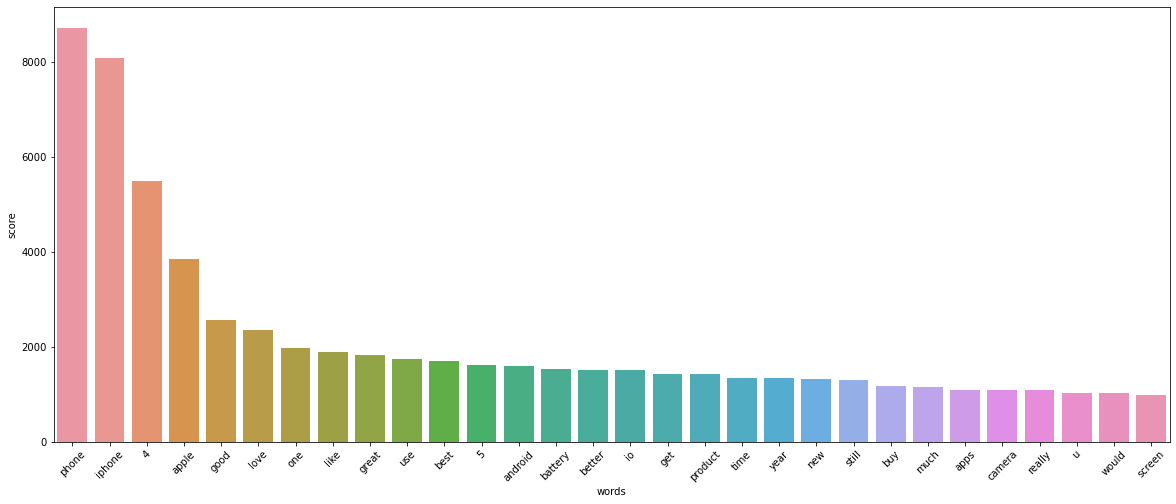

In [47]:
# Barplot for positive word
plt.figure(figsize=(20,8))
sns.barplot(x='words',y='score',data=pos_words)
plt.xticks(rotation=45)
plt.show()

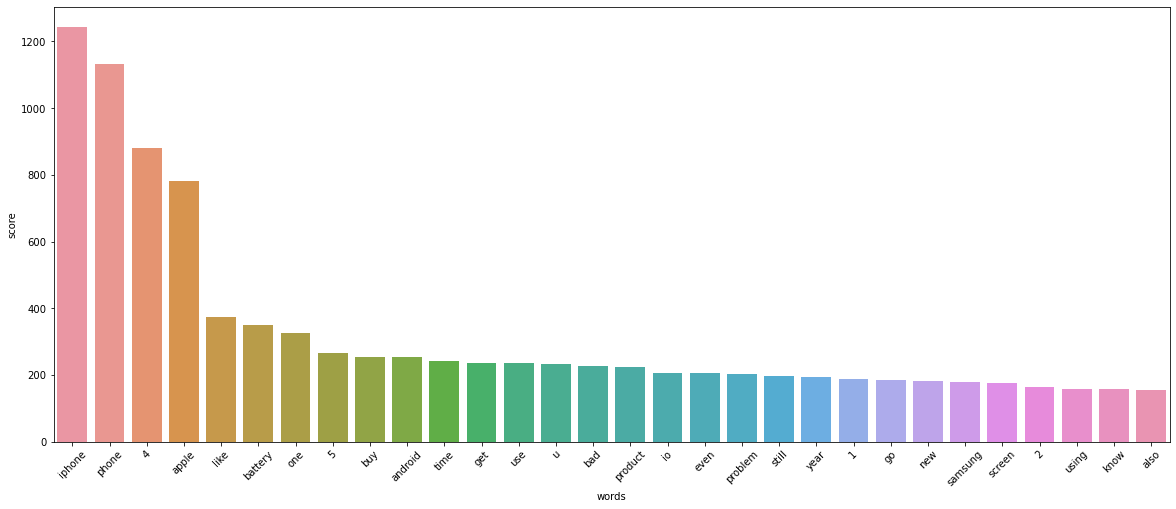

In [48]:
# Barplot for negative word
plt.figure(figsize=(20,8))
sns.barplot(x='words',y='score',data=neg_words)
plt.xticks(rotation=45)
plt.show()

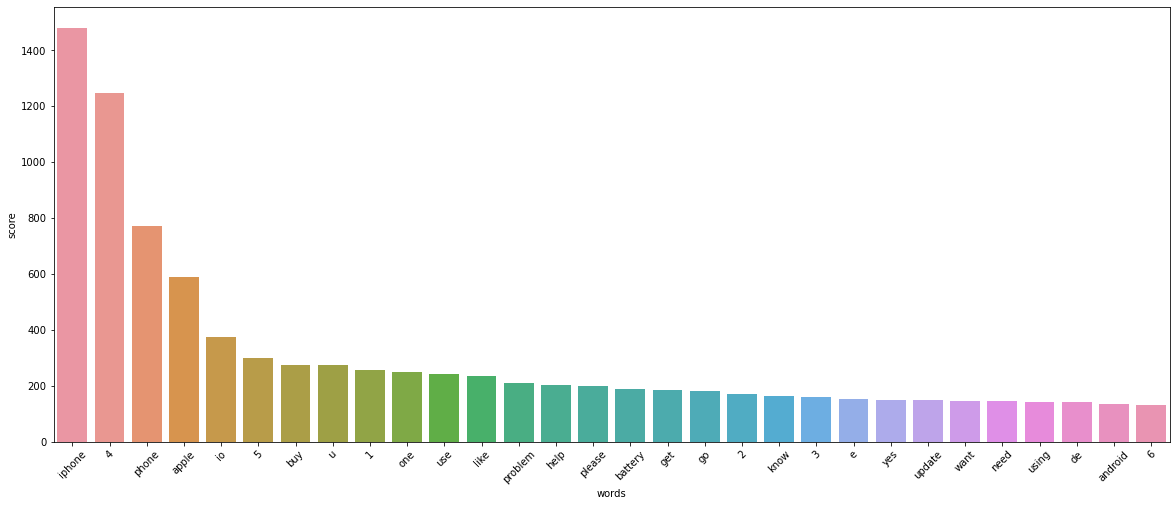

In [49]:
# Barplot for neutral word
plt.figure(figsize=(20,8))
sns.barplot(x='words',y='score',data=neu_words)
plt.xticks(rotation=45)
plt.show()

### Wordcloud

In [50]:
from wordcloud import WordCloud

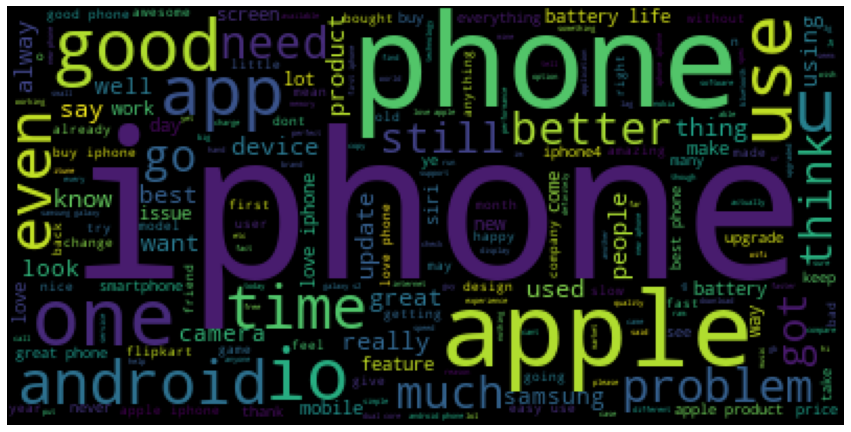

In [51]:
# Visualize the freqent words
all_words = " ".join([sentence for sentence in data['Lammatized']])

wordcloud = WordCloud().generate(all_words)

# Plot the graph

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [52]:
# Define a function for plotting wordcloud
def plot_wordcloud(doc):
    plt.figure(figsize=(15,8))
    mywordcloud = WordCloud().generate(doc)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

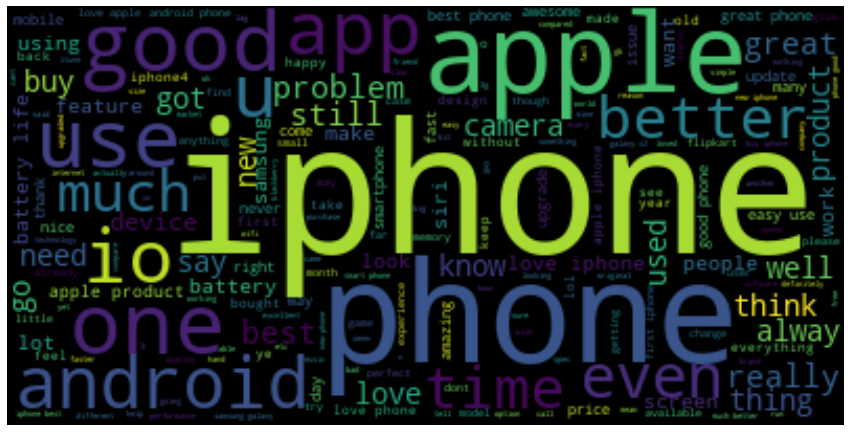

In [53]:
pos_doc = " ".join(positive_token)
plot_wordcloud(pos_doc)

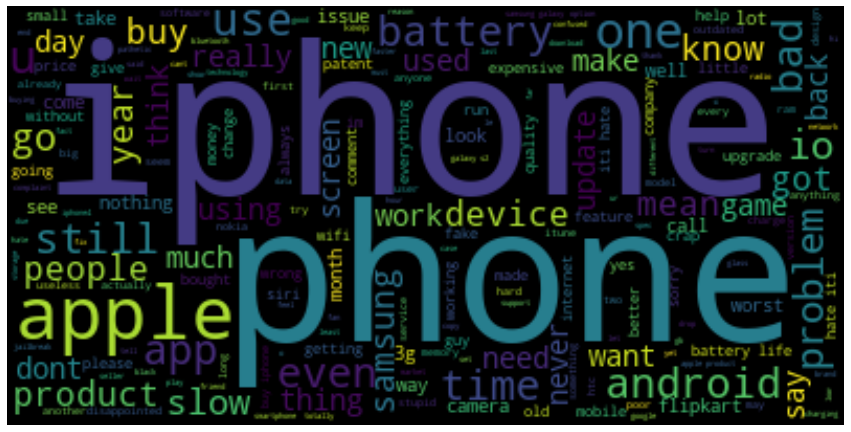

In [54]:
neg_doc = " ".join(negative_token)
plot_wordcloud(neg_doc)

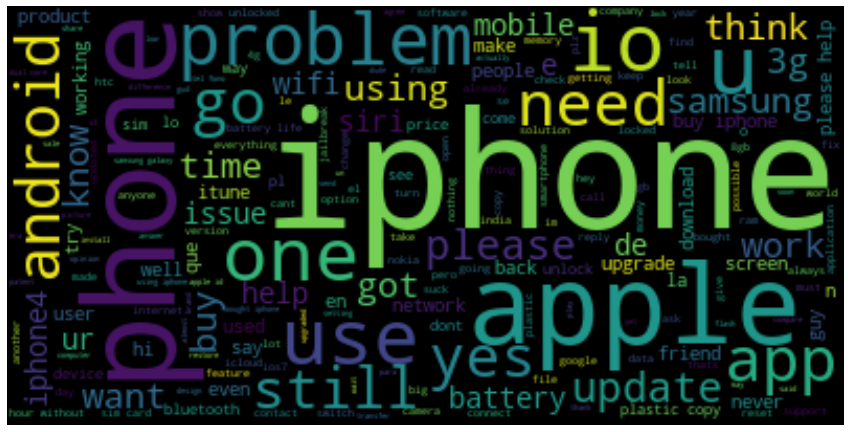

In [55]:
neu_doc = " ".join(neutral_token)
plot_wordcloud(neu_doc)

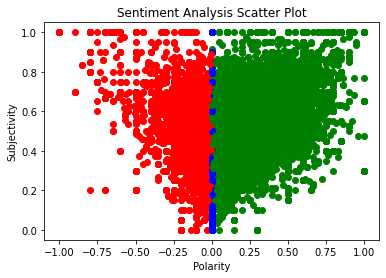

In [56]:
for index, row in data.iterrows():
    if row['sentiment'] == 'Positive':
        plt.scatter(row['polarity'],row['subjectivity'],color='green')
    elif row['sentiment'] == 'Neutral':
        plt.scatter(row['polarity'],row['subjectivity'],color='blue')
    elif row['sentiment'] == 'Negative':
        plt.scatter(row['polarity'],row['subjectivity'],color='red')
        
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()